

---


## **Name : Sunny Mukesh Batavale**


---



## **Buisness Context :**
Have you ever wondered when the best
time of year to book a hotel room is? Or
the optimal length of stay in order to get
the best daily rate? What if you wanted to
predict whether or not a hotel was likely to
receive a disproportionately high number
of special requests? This hotel booking
dataset can help you explore those
questions! This data set contains booking
information for a city hotel and a resort
hotel, and includes information such as
when the booking was made, length of
stay, the number of adults, children,
and/or babies, and the number of
available parking spaces, among other
things. All personally identifying
information has been removed from the
data. Explore and analyse the data to
discover important factors that govern
the bookings.

# **Dataset Description**

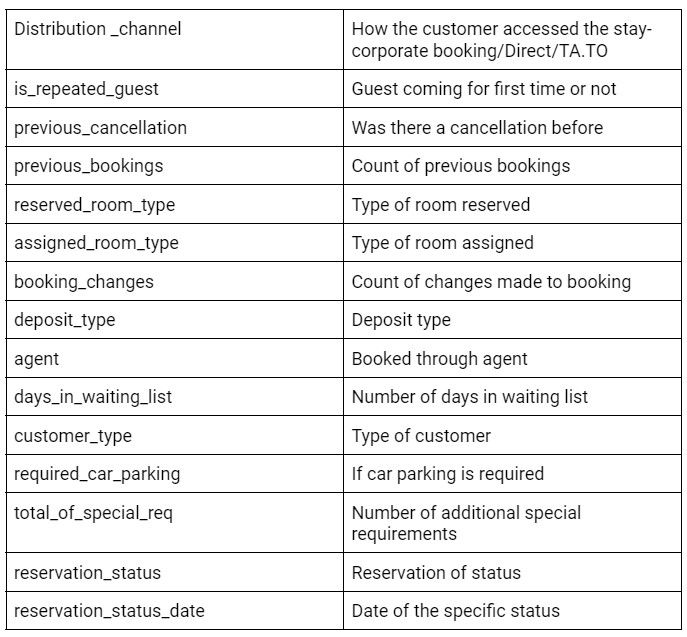

# **Importing Libraries and Dataset**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
hotel_booking_df = pd.read_csv("Hotel Bookings.csv")

In [3]:
hotel_booking_df.shape

(103060, 32)

In [4]:
hotel_booking_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,03-07-2015


# **Data Cleaning and Feature Engineering**

In [5]:
hotel_booking_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
hotel_booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103060 entries, 0 to 103059
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           103060 non-null  object 
 1   is_canceled                     103060 non-null  int64  
 2   lead_time                       103060 non-null  int64  
 3   arrival_date_year               103060 non-null  int64  
 4   arrival_date_month              103060 non-null  object 
 5   arrival_date_week_number        103060 non-null  int64  
 6   arrival_date_day_of_month       103060 non-null  int64  
 7   stays_in_weekend_nights         103060 non-null  int64  
 8   stays_in_week_nights            103060 non-null  int64  
 9   adults                          103060 non-null  int64  
 10  children                        103056 non-null  float64
 11  babies                          103060 non-null  int64  
 12  meal            

In [7]:
hotel_booking_df.isna().sum().sort_values(ascending=False)[0:4]

company     96914
agent       14846
country       488
children        4
dtype: int64



---



*   The columns Comany, Agent CONTAINS many null values, But as in these two attributes we have not provided the usefull information we will delete thse two attributes from the dataset

*   as the country column contains very few null values compare to dataset then we will delete those records, because it doest not make sence of replacing those values or keeping them

*   While the children Attribute contains 4 null values so we will replace those null values with zeros.


---



In [8]:
hotel_booking_df.drop(columns=['company','agent'],inplace=True)

In [9]:
hotel_booking_df.shape

(103060, 30)

In [10]:
hotel_booking_df = hotel_booking_df[~hotel_booking_df['country'].isna()]

In [11]:
hotel_booking_df['children'].fillna(0,inplace=True)

<ipython-input-11-eaf6f3a0b426>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_booking_df['children'].fillna(0,inplace=True)


In [12]:
hotel_booking_df.isna().sum().sort_values(ascending=False)[:3]

reservation_status_date      1
reservation_status           1
total_of_special_requests    1
dtype: int64

In [13]:
hotel_booking_df['reservation_status_date'].dtype

dtype('O')

In [14]:
# Converting the Data type of reservation_status_date to date-time
hotel_booking_df['reservation_status_date'] = pd.to_datetime(hotel_booking_df['reservation_status_date'])
hotel_booking_df['reservation_status_date'].dtype

<ipython-input-14-2ced893a0b0a>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  hotel_booking_df['reservation_status_date'] = pd.to_datetime(hotel_booking_df['reservation_status_date'])


dtype('<M8[ns]')

### **Reservation_status_month**

**Creating a column Having only month from Reservation_status_date**

In [15]:
hotel_booking_df['reservation_status_month'] = hotel_booking_df['reservation_status_date'].dt.strftime('%B')
hotel_booking_df['reservation_status_month'].value_counts()

October      10485
September     9239
January       9177
July          8875
August        8792
June          8669
November      8466
March         8284
February      8179
April         8004
May           7687
December      6714
Name: reservation_status_month, dtype: int64

**Combing the babies and Children columns in one column called Total_kids**

In [16]:
hotel_booking_df['Total_kids']=hotel_booking_df['babies']+hotel_booking_df['children']

**Dropping The babies and Children columns**

In [17]:
hotel_booking_df.drop(columns=['babies','children'],inplace=True)

In [18]:
hotel_booking_df.shape

(102572, 30)

**Creating the Total_members, Total Stay & Total Revenue Columns**

In [154]:
hotel_booking_df['Total_stay']=hotel_booking_df['stays_in_week_nights']+hotel_booking_df['stays_in_weekend_nights']

In [20]:
hotel_booking_df['Total_revenue'] = hotel_booking_df['Total_stay']*hotel_booking_df['adr']

In [21]:
hotel_booking_df['Total_members'] = hotel_booking_df['adults']+hotel_booking_df['Total_kids']

In [22]:
hotel_booking_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'reservation_status_month', 'Total_kids', 'Total_stay', 'Total_revenue',
       'Total_members'],
      dtype='object')

**Looking For Unique Values/Records from dataset**

In [23]:
hotel_booking_df.nunique()

hotel                                 2
is_canceled                           2
lead_time                           478
arrival_date_year                     3
arrival_date_month                   12
arrival_date_week_number             53
arrival_date_day_of_month            31
stays_in_weekend_nights              15
stays_in_week_nights                 33
adults                               14
meal                                  5
country                             168
market_segment                        8
distribution_channel                  5
is_repeated_guest                     2
previous_cancellations               15
previous_bookings_not_canceled       73
reserved_room_type                   10
assigned_room_type                   12
booking_changes                      20
deposit_type                          3
days_in_waiting_list                126
customer_type                         4
adr                                8364
required_car_parking_spaces           5


In [24]:
hotel_booking_df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)



---



## **Creating two different datasets On the basis of Hotel**


---


 **As the Resort Hotel and City Hotel are two distinct types of accommodations it becomes important to do analysis of both independently**


---



In [25]:
#Creating resort hotel dataset
resort_hotel = hotel_booking_df[hotel_booking_df['hotel']=='Resort Hotel']
resort_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_month,Total_kids,Total_stay,Total_revenue,Total_members
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0.0,Check-Out,2015-01-07,January,0.0,0,0.0,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0.0,Check-Out,2015-01-07,January,0.0,0,0.0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,75.0,0.0,0.0,Check-Out,2015-02-07,February,0.0,1,75.0,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,75.0,0.0,0.0,Check-Out,2015-02-07,February,0.0,1,75.0,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,98.0,0.0,1.0,Check-Out,2015-03-07,March,0.0,2,196.0,2.0


In [26]:
resort_hotel.shape

(39596, 33)

In [27]:
# Creating the City hotel dataset
city_hotel = hotel_booking_df[hotel_booking_df['hotel']=='City Hotel']
city_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_month,Total_kids,Total_stay,Total_revenue,Total_members
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,0.0,0.0,0.0,Check-Out,2015-03-07,March,0.0,2,0.0,1.0
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,76.5,0.0,1.0,Canceled,2015-01-07,January,0.0,4,306.0,2.0
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,68.0,0.0,1.0,Canceled,2015-04-30,April,0.0,4,272.0,1.0
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,76.5,0.0,2.0,Canceled,2015-06-23,June,0.0,6,459.0,2.0
40064,City Hotel,1,100,2015,July,27,2,0,2,2,...,76.5,0.0,1.0,Canceled,2015-02-04,February,0.0,2,153.0,2.0


In [28]:
city_hotel.shape

(62976, 33)

# **Exploratory Data Analysis**

# **Univarient Analysis**

## **1. Numercal data**

In [29]:
resort_hotel['lead_time'].describe()

count    39596.000000
mean        93.438857
std         97.387321
min          0.000000
25%         11.000000
50%         59.000000
75%        155.000000
max        737.000000
Name: lead_time, dtype: float64

In [30]:
resort_hotel['adr'].describe()

count    39596.000000
mean        95.347555
std         61.495116
min         -6.380000
25%         50.500000
50%         76.000000
75%        125.617500
max        508.000000
Name: adr, dtype: float64

In [31]:
resort_hotel['Total_revenue'].describe()

count    39596.000000
mean       438.041722
std        455.074350
min        -63.800000
25%        120.000000
50%        276.000000
75%        595.000000
max       6300.000000
Name: Total_revenue, dtype: float64

In [32]:
city_hotel['lead_time'].describe()

count    62976.000000
mean       113.353897
std        113.139437
min          0.000000
25%         25.000000
50%         76.000000
75%        169.000000
max        629.000000
Name: lead_time, dtype: float64

In [33]:
city_hotel['adr'].describe()

count    62975.000000
mean       102.318775
std         43.311309
min          0.000000
25%         76.500000
50%         96.900000
75%        121.230000
max       5400.000000
Name: adr, dtype: float64

In [34]:
city_hotel['Total_revenue'].describe()

count    62975.000000
mean       307.832759
std        243.506007
min          0.000000
25%        150.000000
50%        255.000000
75%        385.960000
max       6148.000000
Name: Total_revenue, dtype: float64



---


* **Hence The Average Dailly Rate (ADR) of City Hotel is More than Resort
Hotel but the Average Revenue Made by Resort Hotel is more than City Hotel**

* **Also the average Lead Time of city Hotel is more in comapre to Resort Hotel**


---



In [35]:
resort_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'reservation_status_month', 'Total_kids', 'Total_stay', 'Total_revenue',
       'Total_members'],
      dtype='object')

In [36]:
resort_hotel['Total_stay'].describe()

count    39596.000000
mean         4.337913
std          3.356770
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         56.000000
Name: Total_stay, dtype: float64

In [37]:
city_hotel['Total_stay'].describe()

count    62976.000000
mean         2.947933
std          1.878240
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         57.000000
Name: Total_stay, dtype: float64



---


* **there is huge difference between the maximun stayed days and the average stayed days.**


---



## **2. categorical data**

In [38]:
hotel_booking_df['meal'].value_counts()

BB           80006
HB           13204
SC            7401
Undefined     1165
FB             796
Name: meal, dtype: int64



---


* **Hence From Above data we can conclude that most of the customers prefer the BB (Bed & Breakfast) category as it is less expensive compare to other Plans.**


---



In [39]:
hotel_booking_df['country'].value_counts().sort_values(ascending=False)[0:10]

PRT    46345
GBR    10282
FRA     7754
ESP     7593
DEU     5288
ITA     3099
IRL     2945
BEL     1734
BRA     1689
NLD     1595
Name: country, dtype: int64

In [40]:
hotel_booking_df['market_segment'].value_counts()

Online TA        46449
Offline TA/TO    21804
Groups           18340
Direct           10363
Corporate         4784
Complementary      654
Aviation           176
Undefined            2
Name: market_segment, dtype: int64



---


* **From the data we can say that the most of the customers Book the hotel through Travel Agencies(TA)**
* **In that also the Customer prefer the online Booking through TA**


---



In [41]:
hotel_booking_df['distribution_channel'].value_counts()

TA/TO        84091
Direct       12315
Corporate     6047
GDS            114
Undefined        5
Name: distribution_channel, dtype: int64

In [42]:
hotel_booking_df['deposit_type'].value_counts()

No Deposit    87837
Non Refund    14573
Refundable      161
Name: deposit_type, dtype: int64

In [43]:
hotel_booking_df['customer_type'].value_counts()

Transient          76020
Transient-Party    22002
Contract            4051
Group                498
Name: customer_type, dtype: int64



---


* **The Above Data shows that the most of the customers are Trancient that means the number of individual customers is hight than the group or other type of customers**


---



In [44]:
hotel_booking_df['reservation_status'].value_counts()

Check-Out    58429
Canceled     42944
No-Show       1198
Name: reservation_status, dtype: int64

# **Findind Out The Trend And Patterns From the Datasets through data Visulization**

* ## **Looking for Corrleation Among differrent Attributes**

<ipython-input-45-259bafd1d84d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = hotel_booking_df.corr()


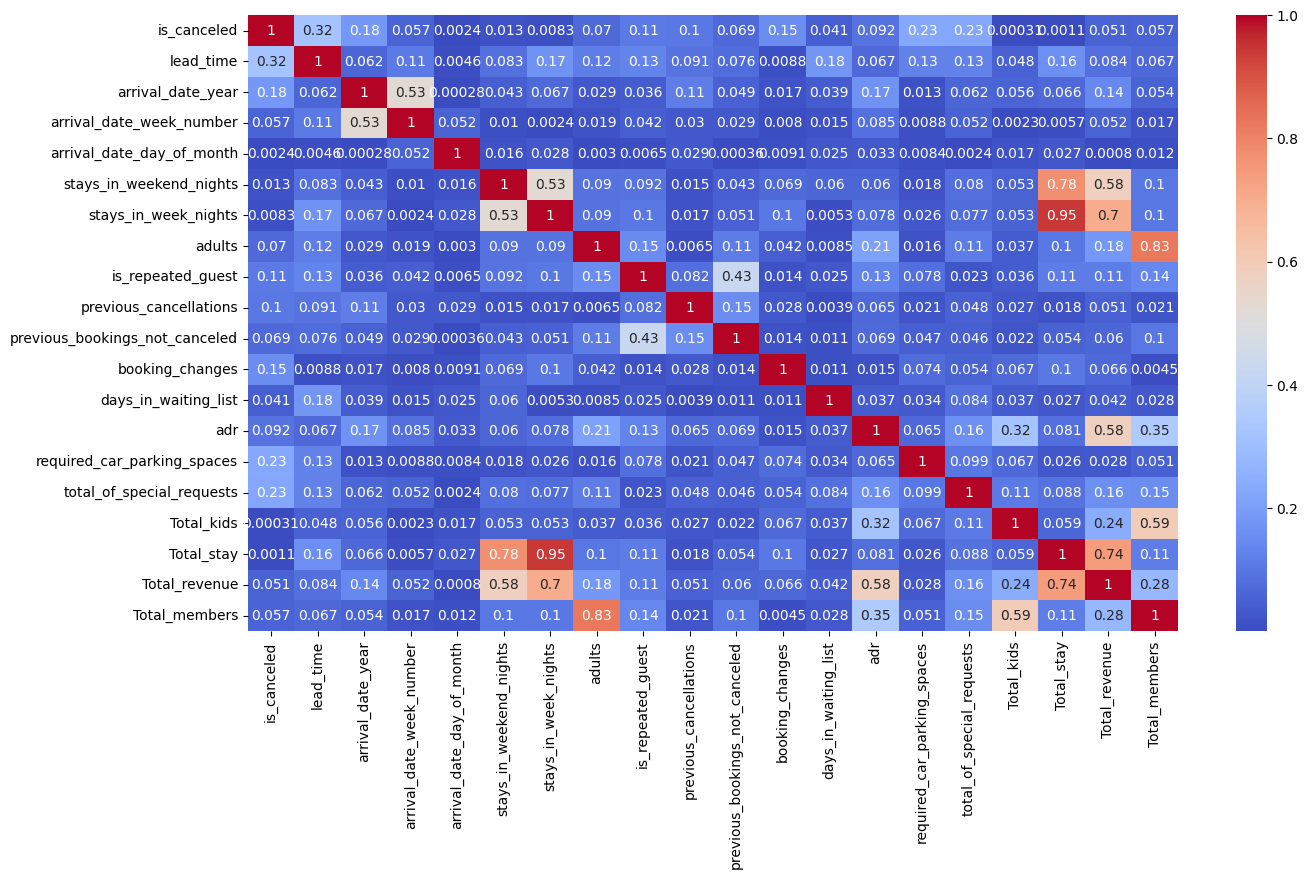

In [45]:
 ## Correlation between variables
plt.figure(figsize=(15,8))
correlation = hotel_booking_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()



---


* **As we can see here there is no Such Strong Correlation among the attributes.**

* **There are some Instances where we can see the correlation but as we hvae derived some columns from the original, it is obvious to see those correlations.**


---



# **1. Booking Patterns and Trends:**

## **1.1 Total Arrivals per Month**

In [46]:
month = hotel_booking_df.groupby(by=['arrival_date_month','hotel']).size().reset_index(name='Total checked in')
# Taking Month Order to Sort the Dataset from January to December
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# Sorting the Dataset
month = month.sort_values(by='arrival_date_month', key=lambda x: x.map({val: i for i, val in enumerate(month_order)}))
month [0:6]

,arrival_date_month,hotel,Total checked in
8,January,City Hotel,2484
9,January,Resort Hotel,2138
6,February,City Hotel,3391
7,February,Resort Hotel,3047
15,March,Resort Hotel,3281
14,March,City Hotel,4378


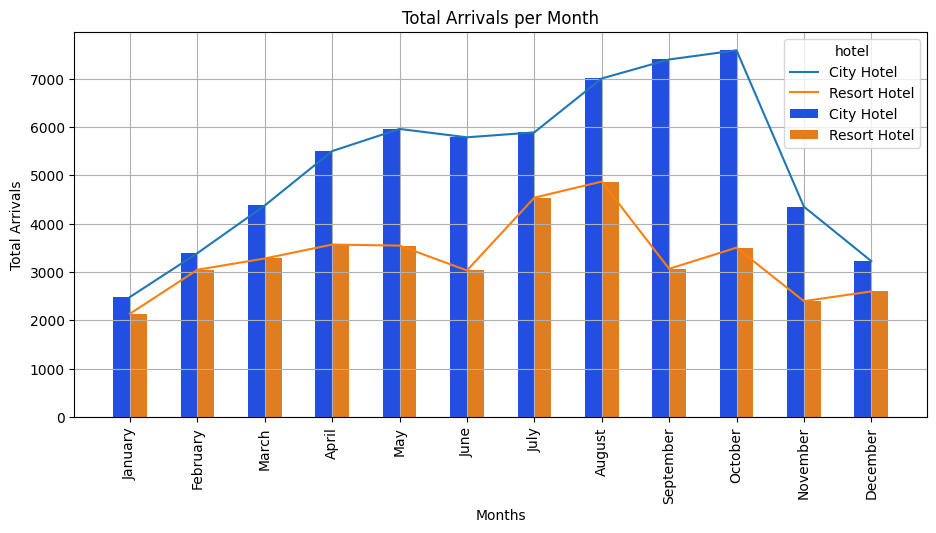

In [47]:
plt.figure(figsize=(11,5))
sns.barplot(x='arrival_date_month',y='Total checked in',data=month,palette="bright",width=0.5,hue='hotel')
sns.lineplot(x='arrival_date_month',y='Total checked in',data=month,hue='hotel')
plt.title('Total Arrivals per Month')
plt.xlabel('Months')
plt.ylabel('Total Arrivals')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

### **1.1.1 Resort Hotel**



---


*   **By seeing the graph we come to know that specially on July & August months the customers are mostly like to book the Resort hotel.**
*   **The Main reason behind this might be the Mansoon.**
*   **The customer like to spend their time in resort Hotel more in rainy Season than other seasons.**
*  **Also There is hype in April & May as the Many People like to go at Resort in Summer Vacations.**


---



### **1.1.2 City Hotel**

* ### **Simmilar to our previous analysis for resort Hotel  here also we can see that ithere is a hype in August Month**


---




## **1.2 Average Lead Time Per Month**

In [48]:
avg_lead = hotel_booking_df.groupby(by=['arrival_date_month','hotel'])['lead_time'].mean().reset_index(name='avg lead time')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
avg_lead = avg_lead.sort_values(by='arrival_date_month', key=lambda x: x.map({val: i for i, val in enumerate(month_order)}))
avg_lead[0:6]

,arrival_date_month,hotel,avg lead time
8,January,City Hotel,65.521739
9,January,Resort Hotel,26.629560
6,February,City Hotel,57.061339
7,February,Resort Hotel,40.555300
15,March,Resort Hotel,65.198415
14,March,City Hotel,76.937643


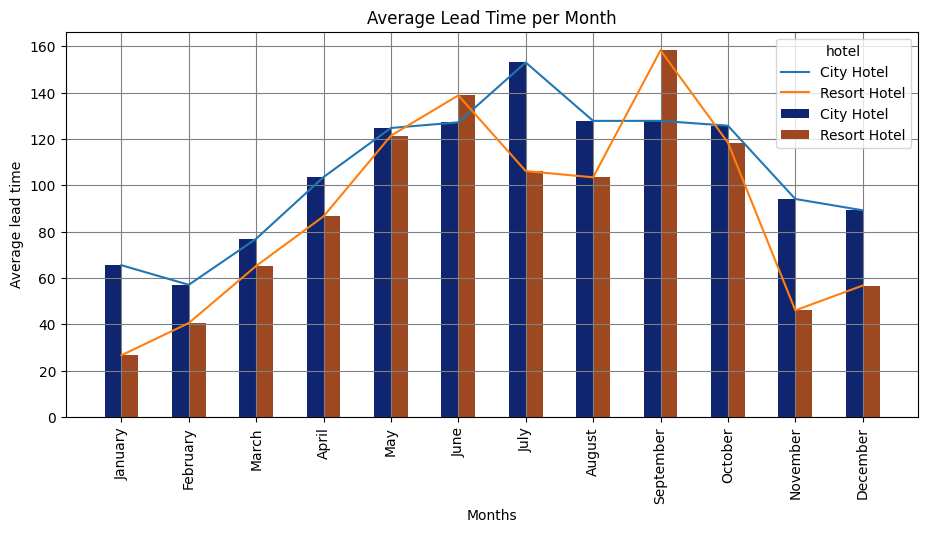

In [49]:
plt.figure(figsize=(11,5))
sns.barplot(x='arrival_date_month',y='avg lead time',data=avg_lead,palette="dark",width=0.5,hue='hotel')
sns.lineplot(x='arrival_date_month',y='avg lead time',data=avg_lead,hue='hotel')

plt.title('Average Lead Time per Month')
plt.xlabel('Months')
plt.ylabel('Average lead time')
plt.grid(True,color='gray')
plt.xticks(rotation=90)
plt.show()

* ### **By comaparing the Above Graph with the Total Arrivals Per Month :**
* ### **I) Resort Hotel :**


---


 **There is Quite Negative Correlation Between the Total Arrivals Per month and Average Lead Time Per Month. ie The lead time is Less But the Arrivals of customer is high.**

 **This might occur when last-minute bookings or spontaneous travel plans are more common, resulting in higher total arrivals but shorter lead times as guests make their reservations closer to their arrival dates.**


---



* ### **II) City Hotel :**


---


 **Here We can see That Except July There is a positive Correlation Between Arrivals and lead time.**

 **Here We can say that To Secure their preffered dates The customers secure their reservations too early.**

 **Also we come to know that in City Hotel There Might be the limmited room inventory so that As the Arrivals are high the customers try to book thier rooms in advanced.**


---



## **1.3 Total Stayed Days**

In [50]:
total_stay = hotel_booking_df.groupby(by=['arrival_date_month','hotel'])['Total_stay'].sum().reset_index(name='Total stay')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
total_stay = total_stay.sort_values(by='arrival_date_month', key=lambda x: x.map({val: i for i, val in enumerate(month_order)}))
total_stay[0:6]

,arrival_date_month,hotel,Total stay
8,January,City Hotel,7360
9,January,Resort Hotel,6297
6,February,City Hotel,9974
7,February,Resort Hotel,9540
15,March,Resort Hotel,13682
14,March,City Hotel,13406


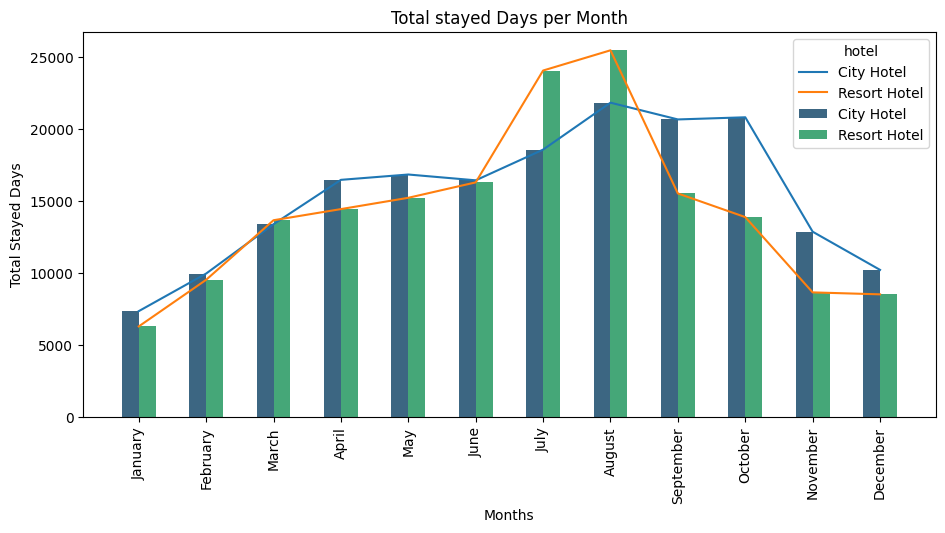

In [51]:
plt.figure(figsize=(11,5))
sns.barplot(x='arrival_date_month',y='Total stay',data=total_stay,palette="viridis",width=0.5,hue='hotel')
sns.lineplot(x='arrival_date_month',y='Total stay',data=total_stay,hue='hotel')

plt.title('Total stayed Days per Month')
plt.xlabel('Months')
plt.ylabel('Total Stayed Days')
plt.xticks(rotation=90)
plt.show()

* ### **I) Resort Hotel**


---


 **Here in July and August Month there is significant hype in total Stayed days, we know that the Total Arrivals per month is also High in these months, So we can say that The  customers Come in July And August Are mostly like to spend more days in hotel**


---



* ### **II) City Hotel**
 **Like to Resort hotel here also hype in July & August but also we can see that in summer season people are staying more days in hotel**


---



### **1.3.1 Total Stayed days With Respect to Cystomer Type**

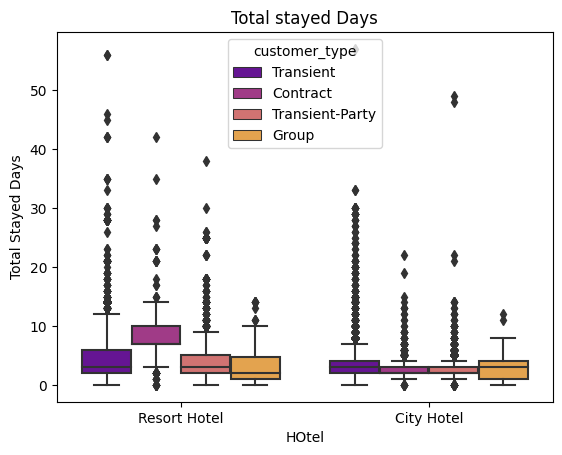

In [52]:
sns.boxplot(x='hotel',y='Total_stay',data=hotel_booking_df,hue='customer_type',palette='plasma')

plt.title('Total stayed Days')
plt.xlabel('HOtel')
plt.ylabel('Total Stayed Days')
plt.show()



---


* **From the Above visulization and Our Univarient Analysis on Total Styed Days we come to know that there are many Outliers**
* **But we can Clearly se the variation in contract type customers, where the Number of contract Customer stayed in resort Hotel is more than the City Hotel**


---




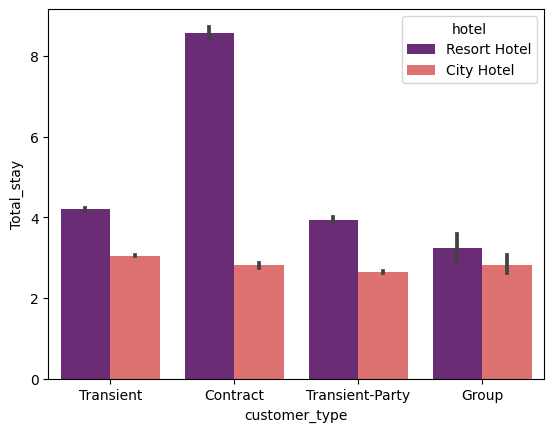

In [53]:
sns.barplot(x='customer_type',y='Total_stay',data=hotel_booking_df,hue='hotel',palette="magma")
plt.show()



---


* **From above Bar chart we can clearly see the difference in the Contract Type Customer in Resort hotel and City hotel.**
* **The Contract type customers includes corporate clients or companies that regularly send employees to a particular hotel.**

###**So we can canclude that mostly corporate clients and companies prefer Resort Hotel for there official mittings or other purpose than City Hotel.**


---



### **1.3.2 Weekend Nights**

In [54]:
resort_weekend_night_per = (resort_hotel['stays_in_weekend_nights'].sum()/resort_hotel['Total_stay'].sum())*100
resort_weekend_night_per

27.579702382338557

In [55]:
city_weekend_night_per = (city_hotel['stays_in_weekend_nights'].sum()/city_hotel['Total_stay'].sum())*100
city_weekend_night_per

26.464995771590477



---


* **From the Above Calculations We come to know that in Resort Hotel almost 27.60% customers Books the weekend Nights & in City Hotel almost 26.7% customers prefer to book weekend Nights.**


---



*  **i) Resort Hotel**

In [56]:
wkend_nyt = hotel_booking_df.groupby(by=['arrival_date_month','hotel'])['stays_in_weekend_nights'].sum().reset_index(name='Total stay in weekend Nights')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
wkend_nyt = wkend_nyt.sort_values(by='arrival_date_month', key=lambda x: x.map({val: i for i, val in enumerate(month_order)}))
wkend_nyt[0:6]

,arrival_date_month,hotel,Total stay in weekend Nights
8,January,City Hotel,1927
9,January,Resort Hotel,1662
6,February,City Hotel,2807
7,February,Resort Hotel,2703
15,March,Resort Hotel,3443
14,March,City Hotel,3298


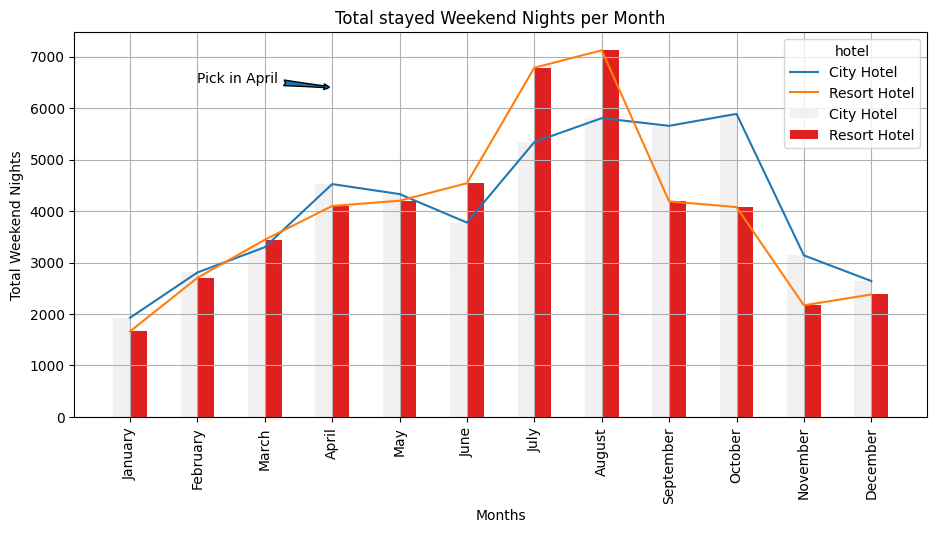

In [57]:
plt.figure(figsize=(11,5))
sns.barplot(x='arrival_date_month',y='Total stay in weekend Nights',data=wkend_nyt,color='red',width=0.5,hue='hotel')
sns.lineplot(x='arrival_date_month',y='Total stay in weekend Nights',data=wkend_nyt,hue='hotel')

plt.annotate('Pick in April',(3,6400),xytext=(1,6500),arrowprops=dict(arrowstyle="fancy"))
plt.title('Total stayed Weekend Nights per Month')
plt.xlabel('Months')
plt.ylabel('Total Weekend Nights')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()



---


* **The Above Graph Is Showing the Obvious Positive Correlation With Total Arrival per Month.**
* **We can conclude that if there is increase in number of customers then there will chance of increase in demand of weekend Nights.**
* **But for City Hotel, we can see that there is a hype for weekend nights in April, July and August Months months.**

---



## **1.4 Reservtion Status**

In [58]:
reservation_status = resort_hotel['reservation_status'].value_counts()
reservation_status

Check-Out    28519
Canceled     10790
No-Show        287
Name: reservation_status, dtype: int64

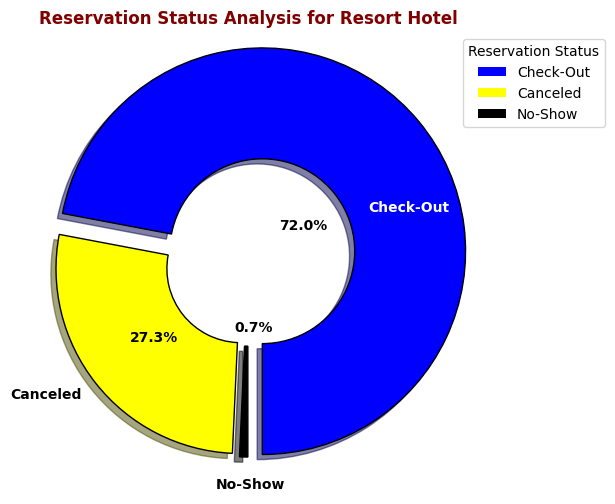

In [59]:
fig, ax = plt.subplots(figsize=(6,6))

colors = ['blue','yellow','black']

wedge,labels, values = plt.pie(list(reservation_status),labels=reservation_status.keys(),colors=colors,autopct='%1.1f%%',explode=[0.1,0.05,0.05],startangle=-90,shadow=True, textprops={'fontsize':10,'fontweight':'bold'})
plt.title('Reservation Status Analysis for Resort Hotel',color='maroon',fontweight='bold')

plt.legend(title='Reservation Status',bbox_to_anchor=(0.95,1))

for i,wedge in enumerate(wedge):
  wedge.set_edgecolor('black')
  wedge.set_width(0.6)
  if reservation_status.keys()[i] == "Check-Out":
    wedge.set_radius(1.1)

labels[0].set_position((0.65,0.3))
labels[0].set_color('white')
labels[2].set_position((0.2,-1.2))

values[0].set_position((0.3,0.2))
values[2].set_position((0.03,-0.35))

plt.show()

In [60]:
reservation_status_02 = city_hotel['reservation_status'].value_counts()
reservation_status_02

Canceled     32154
Check-Out    29910
No-Show        911
Name: reservation_status, dtype: int64

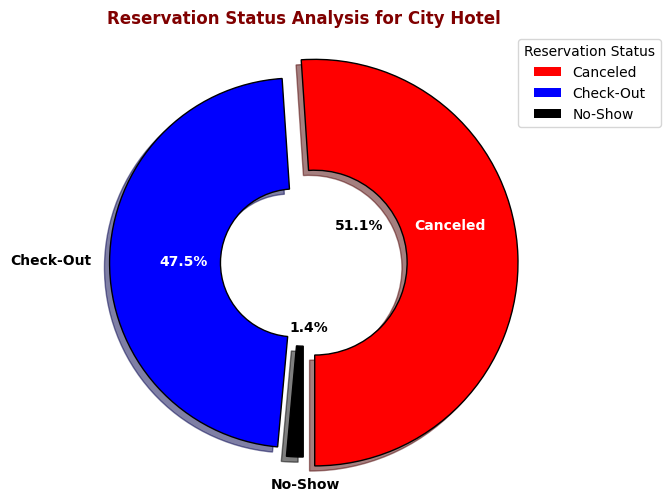

In [61]:
fig, ax = plt.subplots(figsize=(6,6))

colors = ['red','blue','black']

wedge,labels, values = plt.pie(list(reservation_status_02),labels=reservation_status_02.keys(),colors=colors,autopct='%1.1f%%',explode=[0.06,0.05,0.05],startangle=-90,shadow=True, textprops={'fontsize':10,'fontweight':'bold'})
plt.title('Reservation Status Analysis for City Hotel',color='maroon',fontweight='bold')

plt.legend(title='Reservation Status',bbox_to_anchor=(0.95,1))

for i,wedge in enumerate(wedge):
  wedge.set_edgecolor('black')
  wedge.set_width(0.6)
  if reservation_status.keys()[i] == "Check-Out":
    wedge.set_radius(1.1)

labels[0].set_position((0.6,0.2))
labels[0].set_color('white')
labels[2].set_position((0.2,-1.2))

values[0].set_position((0.3,0.2))
values[2].set_position((0.03,-0.35))
values[1].set_color('white')

plt.show()



---


* **IN the Above two charts we can clearly see that in Resort hotel outof total reservation only 72% Customer are checked-out and almost 27.3% customers have canceled their reservastions**

* **In City Hotel almost 40.6% Customers have canceled their reservations and only almost 58.3% customers are checked-out**


---



### **1.4.1 Analysing the Reservation Patterns Across the Months**

* **1. Resort Hotel**

In [62]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
resort_reservation = resort_hotel.groupby(by=['reservation_status_month','reservation_status'])['reservation_status_month'].size().reset_index(name='Count')
resort_reservation = resort_reservation.sort_values(by='reservation_status_month', key=lambda x: x.map({val: i for i, val in enumerate(month_order)}))
resort_reservation[0:5]

,reservation_status_month,reservation_status,Count
14,January,No-Show,23
13,January,Check-Out,2121
12,January,Canceled,1265
11,February,No-Show,32
10,February,Check-Out,2344


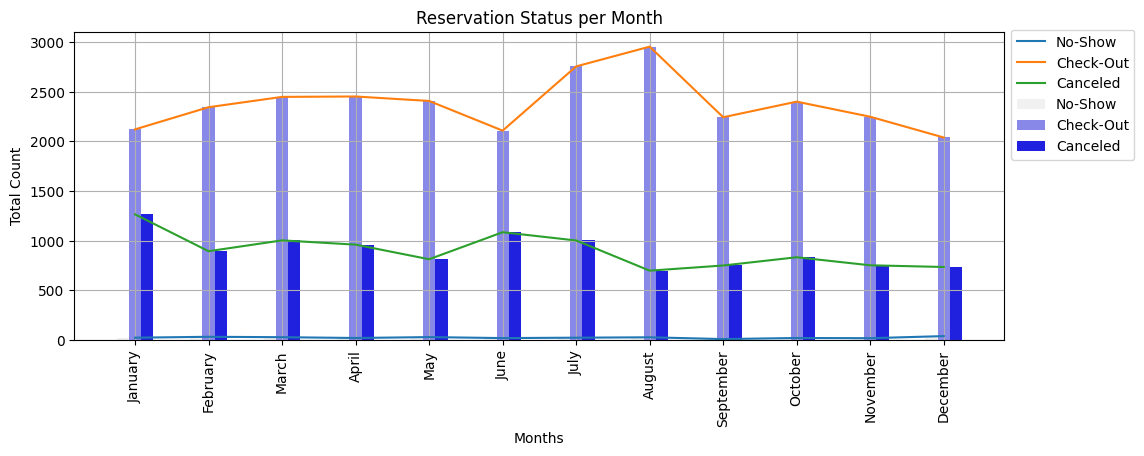

In [63]:
plt.figure(figsize=(12,4))
sns.barplot(x='reservation_status_month',y='Count',data=resort_reservation,color='blue',width=0.5,hue='reservation_status')
sns.lineplot(x='reservation_status_month',y='Count',data=resort_reservation,hue='reservation_status')
plt.title('Reservation Status per Month')
plt.xlabel('Months')
plt.ylabel('Total Count')
plt.legend(bbox_to_anchor=(1,1.03))
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

* **2. City Hotel**

In [64]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
city_reservation = city_hotel.groupby(by=['reservation_status_month','reservation_status'])['reservation_status_month'].size().reset_index(name='Count')
city_reservation = city_reservation.sort_values(by='reservation_status_month', key=lambda x: x.map({val: i for i, val in enumerate(month_order)}))
city_reservation[0:5]

,reservation_status_month,reservation_status,Count
14,January,No-Show,75
13,January,Check-Out,1491
12,January,Canceled,4202
11,February,No-Show,190
10,February,Check-Out,1802


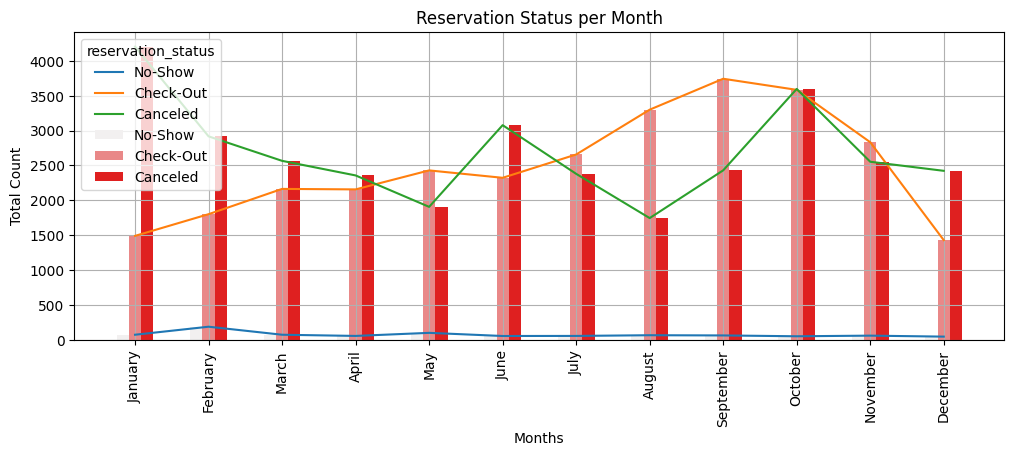

In [65]:
plt.figure(figsize=(12,4))
sns.barplot(x='reservation_status_month',y='Count', data=city_reservation,color='red',width=0.5,hue='reservation_status')
sns.lineplot(x='reservation_status_month',y='Count',data=city_reservation,hue='reservation_status')
plt.title('Reservation Status per Month')
plt.xlabel('Months')
plt.ylabel('Total Count')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()



---


* **By Comapring both Graphs we can Cleary see that in the month May and August The Total Number of cancelation is very less compare to other months.**

* **in City Hotel, As we have also seen in Pie chart The Canceletion rate is higher than Resort Hotel.**


---



### **1.4.2 Analysing the Reserved Room types and assigned room types**

**1. Resort Hotel**

* **Reserved Rooms**

In [66]:
resort_rooms_reserved = resort_hotel['reserved_room_type'].value_counts()
resort_rooms_reserved

A    23022
D     7405
E     4944
G     1599
F     1099
C      917
H      601
L        6
B        3
Name: reserved_room_type, dtype: int64

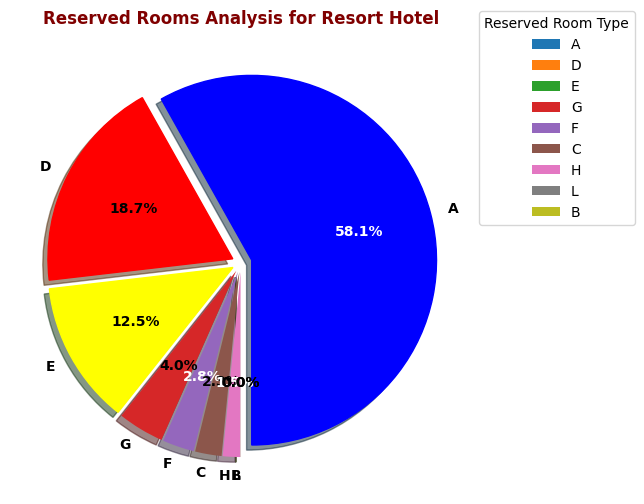

In [67]:
fig, ax = plt.subplots(figsize=(6,6))

wedge,labels, values = plt.pie(list(resort_rooms_reserved),labels=resort_rooms_reserved.keys(),autopct='%1.1f%%',explode=[0.06,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],startangle=-90,shadow=True, textprops={'fontsize':10,'fontweight':'bold'})
plt.title('Reserved Rooms Analysis for Resort Hotel',color='maroon',fontweight='bold')

plt.legend(title='Reserved Room Type',bbox_to_anchor=(1,1.06))

for i,wedge in enumerate(wedge):
  if resort_rooms_reserved.keys()[i]=="A":
    wedge.set_color('blue')
  if resort_rooms_reserved.keys()[i] =="E":
    wedge.set_color('yellow')
  if resort_rooms_reserved.keys()[i] =="D":
    wedge.set_color('red')

values[0].set_color('white')
values[4].set_color('white')
values[6].set_color('white')

plt.show()

* **Assigned Rooms**

In [68]:
resort_rooms_assigned = resort_hotel['assigned_room_type'].value_counts()
resort_rooms_assigned

A    16872
D    10183
E     5570
C     2193
G     1839
F     1714
H      708
I      357
B      159
L        1
Name: assigned_room_type, dtype: int64

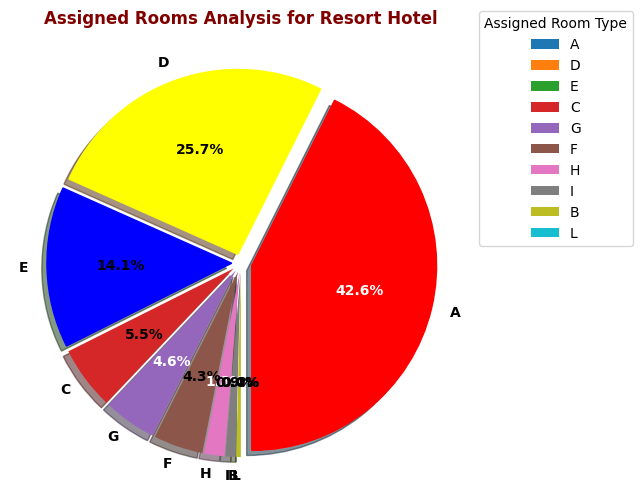

In [69]:
fig, ax = plt.subplots(figsize=(6,6))

wedge,labels, values = plt.pie(list(resort_rooms_assigned),labels=resort_rooms_assigned.keys(),autopct='%1.1f%%',explode=[0.06,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],startangle=-90,shadow=True, textprops={'fontsize':10,'fontweight':'bold'})
plt.title('Assigned Rooms Analysis for Resort Hotel',color='maroon',fontweight='bold')

plt.legend(title='Assigned Room Type',bbox_to_anchor=(1,1.06))

for i,wedge in enumerate(wedge):
  if resort_rooms_assigned.keys()[i] =="A":
    wedge.set_color('red')
  if resort_rooms_assigned.keys()[i] =="D":
    wedge.set_color('yellow')
  if resort_rooms_assigned.keys()[i] =="E":
    wedge.set_color('blue')

values[0].set_color('white')
values[4].set_color('white')
values[6].set_color('white')

plt.show()



---


* **Here from above two pie charts we can clearly see the difference in reserved rooms and the actual assigned rooms.**

* **Almost 58% customers had booked the A room type but only 42.6% customers got the same room as per reservastion.**

* **Here we come to know that in Resort hotel there is demand for A room type but there is defeciency in these type of Rooms.**

* **Next we can see that the D type of roooms are assined more compare to the actul reserved D room type.**


---



**Analysing the distribution of reserved rooms acsros the months**

In [70]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
resort_rserved_rooms = resort_hotel.groupby(by=['reservation_status_month','reserved_room_type'])['reservation_status_month'].size().reset_index(name='Count')
resort_rserved_rooms = resort_rserved_rooms.sort_values(by='reservation_status_month', key=lambda x: x.map({val: i for i, val in enumerate(month_order)}))
# Here I have Ingonered Room Type A as it is higest booked Room accross the months and almost have similar Number of Booking per Month
resort_rserved_rooms = resort_rserved_rooms[resort_rserved_rooms['reserved_room_type']!='A']
resort_rserved_rooms[0:5]

,reservation_status_month,reserved_room_type,Count
36,January,H,44
35,January,G,125
34,January,F,85
33,January,E,400
32,January,D,522


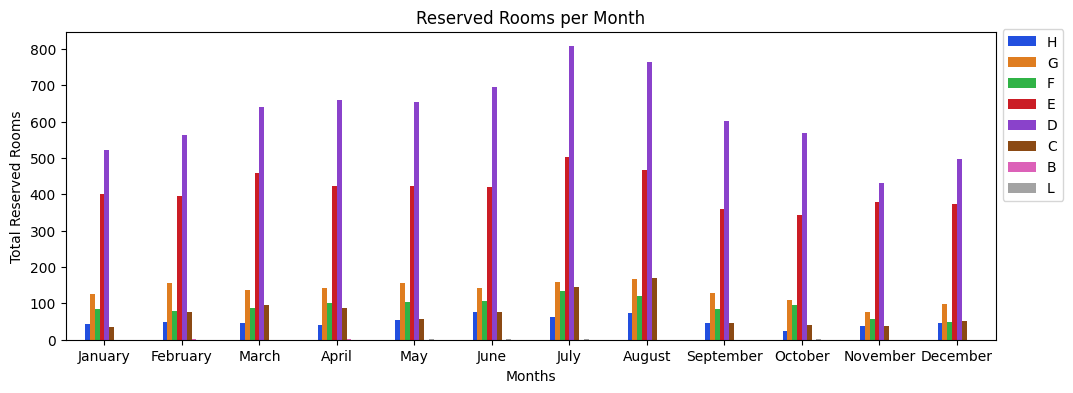

In [71]:
plt.figure(figsize=(12,4))
sns.barplot(x='reservation_status_month',y='Count',data=resort_rserved_rooms,palette='bright',width=0.5,hue='reserved_room_type')
plt.title('Reserved Rooms per Month')
plt.xlabel('Months')
plt.ylabel('Total Reserved Rooms')
plt.legend(bbox_to_anchor=(1,1.03))
plt.show()

In [72]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
resort_assigned_rooms = resort_hotel.groupby(by=['reservation_status_month','assigned_room_type'])['reservation_status_month'].size().reset_index(name='Count')
resort_assigned_rooms = resort_assigned_rooms.sort_values(by='reservation_status_month', key=lambda x: x.map({val: i for i, val in enumerate(month_order)}))
resort_assigned_rooms[0:5]

,reservation_status_month,assigned_room_type,Count
44,January,I,31
43,January,H,48
42,January,G,140
41,January,F,116
40,January,E,462




---


* **Here We Come to know which type of Rooms are Reserved most by customers through Pie Chart.**

* **Also we can see the defeciency in The A type Rooms. Out of 58.1% customers only 42.6% customers have got the A typr rooms.**

* **In Bar plot we can see that for almost every month the reservation of perticular Room type is showing the similar pattern.**


---



**2. City Hotel**

* **Reserved Rooms**

In [73]:
city_rooms_reserved = city_hotel['reserved_room_type'].value_counts()
city_rooms_reserved

A    50725
D     8579
F     1369
B      990
E      982
G      316
C       12
P        2
Name: reserved_room_type, dtype: int64

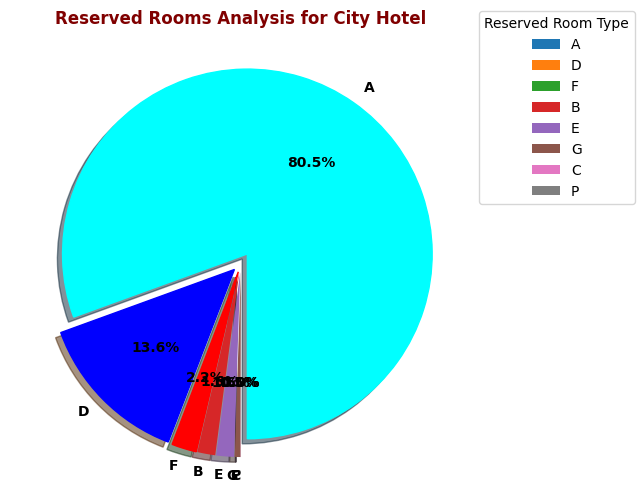

In [74]:
fig, ax = plt.subplots(figsize=(6,6))

wedge,labels, values = plt.pie(list(city_rooms_reserved),labels=city_rooms_reserved.keys(),autopct='%1.1f%%',explode=[0.06,0.05,0.05,0.05,0.05,0.05,0.05,0.05],startangle=-90,shadow=True, textprops={'fontsize':10,'fontweight':'bold'})
plt.title('Reserved Rooms Analysis for City Hotel',color='maroon',fontweight='bold')

plt.legend(title='Reserved Room Type',bbox_to_anchor=(1,1.06))

for i,wedge in enumerate(wedge):
  if city_rooms_reserved.keys()[i]=="A":
    wedge.set_color('aqua')
  if city_rooms_reserved.keys()[i]=="D":
    wedge.set_color('blue')
  if city_rooms_reserved.keys()[i]=="F":
    wedge.set_color('red')
plt.show()

* **Assigned Rooms**

In [75]:
city_rooms_assigned = city_hotel['assigned_room_type'].value_counts()
city_rooms_assigned

A    46057
D    11219
B     1875
E     1549
F     1548
G      471
K      162
C       92
P        2
Name: assigned_room_type, dtype: int64

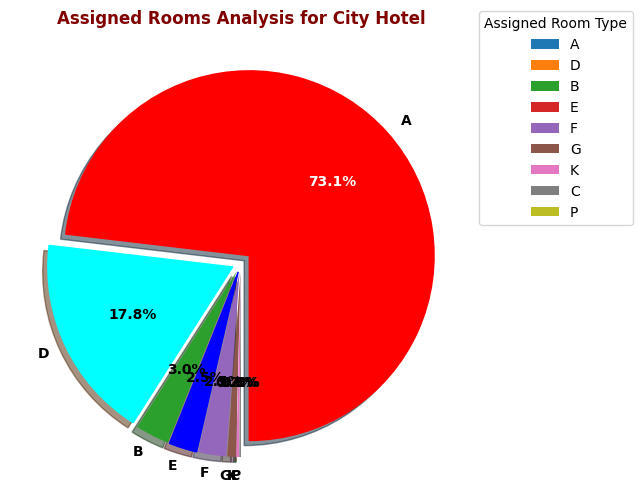

In [76]:
fig, ax = plt.subplots(figsize=(6,6))

wedge,labels, values = plt.pie(list(city_rooms_assigned),labels=city_rooms_assigned.keys(),autopct='%1.1f%%',explode=[0.06,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],startangle=-90,shadow=True, textprops={'fontsize':10,'fontweight':'bold'})
plt.title('Assigned Rooms Analysis for City Hotel',color='maroon',fontweight='bold')

plt.legend(title='Assigned Room Type',bbox_to_anchor=(1,1.06))

for i,wedge in enumerate(wedge):
  if city_rooms_assigned.keys()[i]=="A":
    wedge.set_color('red')
  if city_rooms_assigned.keys()[i]=="D":
    wedge.set_color('aqua')
  if city_rooms_assigned.keys()[i]=="E":
    wedge.set_color('blue')

values[0].set_color('white')

plt.show()



---


* **Accordint to the above two Pie charts, there is huge demand for A type of rooms almost 78.9% customers had booked for this type of rooms, But According to the next Pie chart of assigned rooms we come to know that only 71.9% customers hvae got the same room as they had reserved for.**

* **Also the D type of room is assigned more than the actual reserved rooms.**

* **Also we can see in city hotel there is a defecinecy for F type of rooms.**


---



**Analysing the distribution of reserved rooms acsros the months**

In [77]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
city_rserved_rooms = city_hotel.groupby(by=['reservation_status_month','reserved_room_type'])['reservation_status_month'].size().reset_index(name='Count')
city_rserved_rooms = city_rserved_rooms.sort_values(by='reservation_status_month', key=lambda x: x.map({val: i for i, val in enumerate(month_order)}))
# Here I have Ingonered Room Type A as it is higest booked Room accross the months and almost have similar Number of Booking per Month
city_rserved_rooms = city_rserved_rooms[city_rserved_rooms['reserved_room_type']!='A']
city_rserved_rooms[0:5]

,reservation_status_month,reserved_room_type,Count
31,January,F,87
30,January,E,77
29,January,D,549
28,January,C,2
27,January,B,72


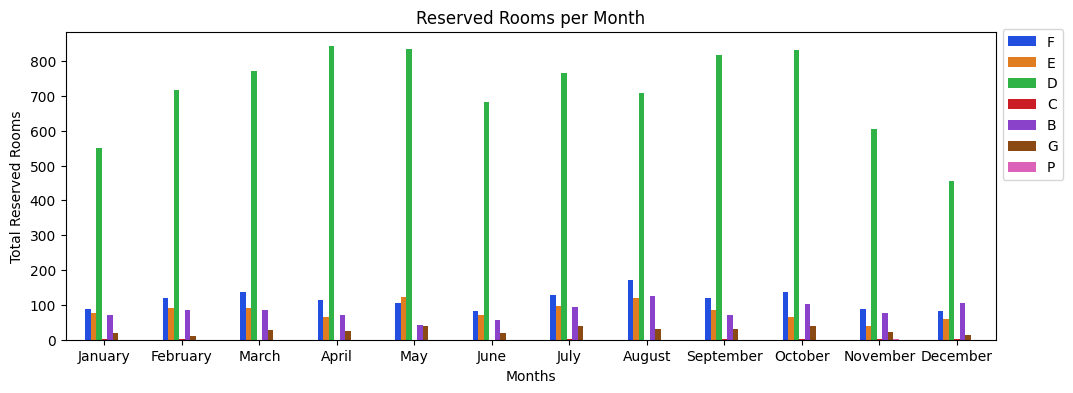

In [78]:
plt.figure(figsize=(12,4))
sns.barplot(x='reservation_status_month',y='Count',data=city_rserved_rooms,palette='bright',width=0.5,hue='reserved_room_type')
plt.title('Reserved Rooms per Month')
plt.xlabel('Months')
plt.ylabel('Total Reserved Rooms')
plt.legend(bbox_to_anchor=(1,1.03))
plt.show()



---


* **Here in City Hotel as we can see in pie chart almost 79% customers have prefered the 'A' Room type and almost 15% customers have prefered the 'D' Room Type, That means almost 94% Reserved Rooms in City Hotel Are only "A' & 'D' Type of Rooms, We can say that A & D type og Rooms Have more demand in City Hotel.**

* **In bar Plot there is simmilar patern of distribution of rserved  Rooms Accros the Months**


---



 ### **1.4.3 Analysing the Average of Customers per Booking/reservation**

**1. Resort Hotel**

In [79]:
resort_hotel['Total_members'].describe()

count    39596.000000
mean         2.016769
std          0.866268
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         55.000000
Name: Total_members, dtype: float64

In [80]:
resort_avg_customer = resort_hotel['Total_members'].sum()/resort_hotel['reservation_status'].size
resort_avg_customer

2.0167693706434995

In [81]:
resort_avg_customer_type = resort_hotel.groupby(by=['customer_type'])['Total_members'].sum()/resort_hotel.groupby(by=['customer_type']).size()
resort_avg_customer_type

customer_type
Contract           1.993806
Group              3.079137
Transient          2.060922
Transient-Party    1.814194
dtype: float64

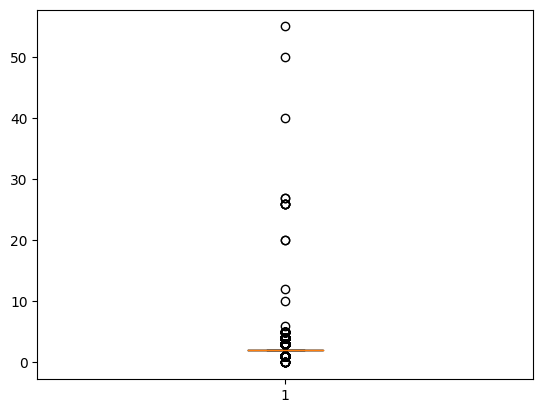

In [82]:
plt.boxplot(resort_hotel['Total_members'])
plt.show()



---


* **As we can see on an average only 2 customers have reserved the rooms in Resort Hotel.**

* **The Customers come in groups has highest average customers per booking, as it is obvious.**

* **But still there are many outliers are present as we can see in boxplot.**

* **'55' is high number of customers per booking in Resort hotel.**


---



**2. City Hotel**

In [83]:
city_hotel['Total_members'].describe()

count    62976.000000
mean         1.933673
std          0.623096
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         12.000000
Name: Total_members, dtype: float64

In [84]:
city_avg_customer = city_hotel['Total_members'].sum()/city_hotel['reservation_status'].size
city_avg_customer

1.9336731453252032

In [85]:
city_avg_customer_type = city_hotel.groupby(by=['customer_type'])['Total_members'].sum()/city_hotel.groupby(by=['customer_type']).size()
city_avg_customer_type

customer_type
Contract           1.991648
Group              1.822727
Transient          1.988340
Transient-Party    1.748877
dtype: float64

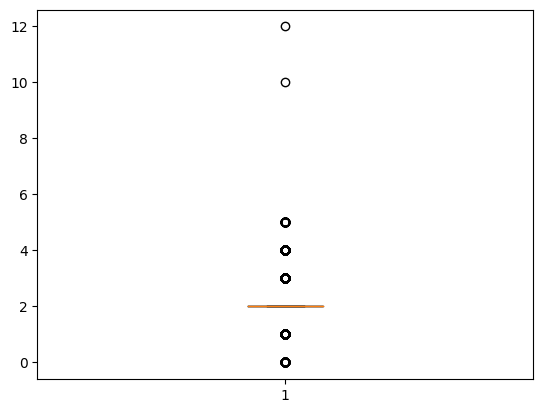

In [86]:
plt.boxplot(city_hotel['Total_members'])
plt.show()



---


* **Here also we can see that on an average almost 2(~1.9) customers have reserved the rooms in City Hotel.**

* **Unlike Resort hotel, In city Hotel the transient type of customers have more avaerage customers per booking with average 2 customers per booking.**

* **Also here we can see that Unlike Resort Hotel, here the maximum number of customers per booking is only '12'.**


---



### **1.4.4 Analysing the The Total number of Customer across the Months**

In [87]:
total_customers_dist = hotel_booking_df.groupby(by=['arrival_date_month','hotel'])['Total_members'].sum().reset_index(name='Total Customers')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
total_customers_dist = total_customers_dist.sort_values(by='arrival_date_month', key=lambda x: x.map({val: i for i, val in enumerate(month_order)}))
total_customers_dist[0:4]

,arrival_date_month,hotel,Total Customers
8,January,City Hotel,4388.0
9,January,Resort Hotel,3733.0
6,February,City Hotel,6367.0
7,February,Resort Hotel,5848.0


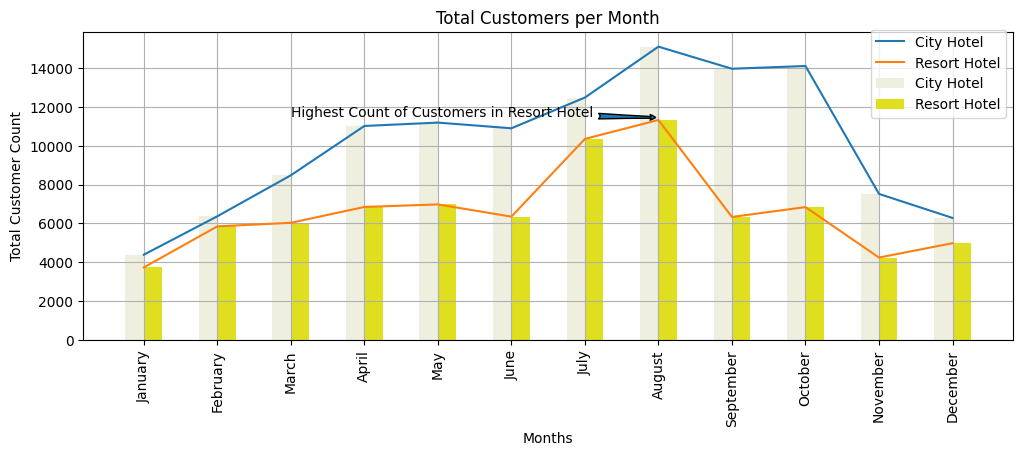

In [88]:
plt.figure(figsize=(12,4))
sns.barplot(x='arrival_date_month',y='Total Customers', data=total_customers_dist,color='yellow',width=0.5,hue='hotel')
sns.lineplot(x='arrival_date_month',y='Total Customers',data=total_customers_dist,hue='hotel')


plt.annotate('Highest Count of Customers in City Hotel',(7,19450),xytext=(2,19000),arrowprops=dict(arrowstyle="fancy"))
plt.annotate('Highest Count of Customers in Resort Hotel',(7,11450),xytext=(2,11500),arrowprops=dict(arrowstyle="fancy"))
plt.title('Total Customers per Month')
plt.xlabel('Months')
plt.ylabel('Total Customer Count')
plt.legend(bbox_to_anchor=(1,1.03))
plt.grid(True)
plt.xticks(rotation=90)
plt.show()



---


* **As We can see in Above graph, it is quite similar to the total arrivals per month. so we can say that the total number of arrivals are diretly propotional to the total number of customers.**


---



### **1.4.5 Checking the Realation between the Number of 'kids' while booking the perticular Type of Room**

**1. Resort Hotel**

In [89]:
resort_kids = resort_hotel.groupby(by=['reserved_room_type'])['Total_kids'].sum().reset_index(name='Total Kids')
resort_kids

,reserved_room_type,Total Kids
0,A,862.0
1,B,0.0
2,C,1248.0
3,D,420.0
4,E,246.0
5,F,99.0
6,G,2222.0
7,H,598.0
8,L,0.0


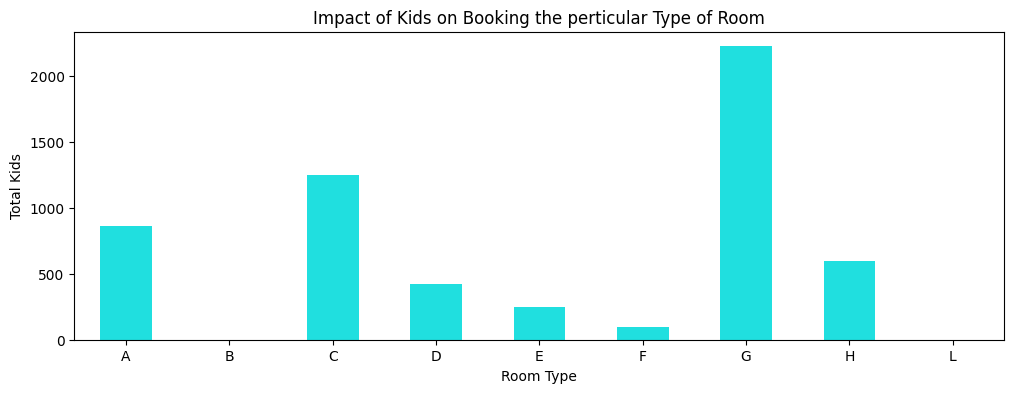

In [90]:
plt.figure(figsize=(12,4))
sns.barplot(x='reserved_room_type',y='Total Kids',data=resort_kids,color='aqua',width=0.5)
plt.title('Impact of Kids on Booking the perticular Type of Room')
plt.xlabel('Room Type')
plt.ylabel('Total Kids')
plt.show()

**2. City Hotel**

In [91]:
city_kids = city_hotel.groupby(by=['reserved_room_type'])['Total_kids'].sum().reset_index(name='Total Kids')
city_kids

,reserved_room_type,Total Kids
0,A,1920.0
1,B,546.0
2,C,2.0
3,D,337.0
4,E,247.0
5,F,2274.0
6,G,301.0
7,P,0.0


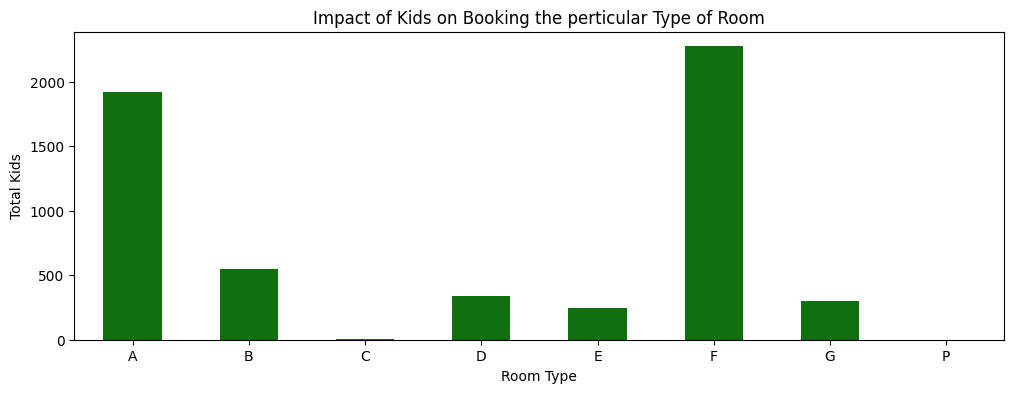

In [92]:
plt.figure(figsize=(12,4))
sns.barplot(x='reserved_room_type',y='Total Kids',data=city_kids,color='green',width=0.5)
plt.title('Impact of Kids on Booking the perticular Type of Room')
plt.xlabel('Room Type')
plt.ylabel('Total Kids')
plt.show()



---


* **From the above two graphs we can clearly see the impact kids in booking the specific type of room.**

* **in Resort Hotel, the most of customers having kids prefer the D type of Rooms and then C & A type of rooms are also booked most by the customers having kids.**

* **IN City Hotel, The F type of rooms are more prefered by the customers having the kids and also A type of rooms are booked by suh customers.**


---



### **1.4.6 Analysing Numbers of Kids with respect to Customer types**

**1. Resort Hotel**

In [93]:
resort_kid_type = resort_hotel.groupby(by=['customer_type'])['Total_kids'].sum()
resort_kid_type

customer_type
Contract             80.0
Group                21.0
Transient          5192.0
Transient-Party     402.0
Name: Total_kids, dtype: float64

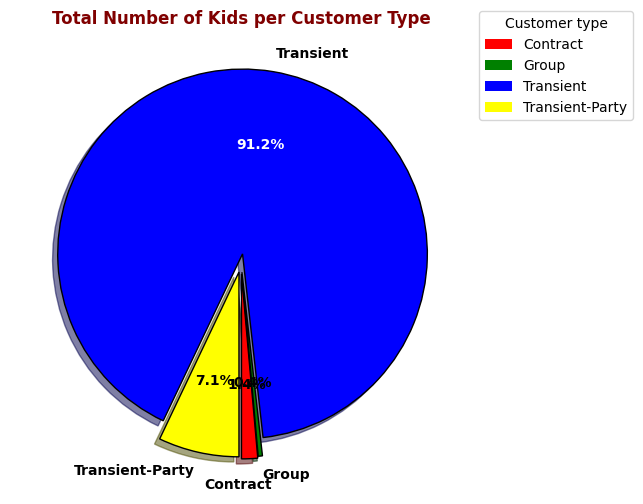

In [94]:
fig, ax = plt.subplots(figsize=(6,6))
colors=['red','green','blue','yellow']
wedge,labels, values = plt.pie(list(resort_kid_type),labels=resort_kid_type.keys(),colors=colors,autopct='%1.1f%%',explode=[0.06,0.05,0.05,0.05 ],startangle=-90,shadow=True, textprops={'fontsize':10,'fontweight':'bold'})
plt.title('Total Number of Kids per Customer Type',color='maroon',fontweight='bold')

plt.legend(title='Customer type',bbox_to_anchor=(1,1.06))

for i,wedge in enumerate(wedge):
  wedge.set_edgecolor('black')

values[2].set_color('white')
labels[0].set_position((-0.2,-1.2))
plt.show()

**2. City Hotel**

In [95]:
city_kid_type = city_hotel.groupby(by=['customer_type'])['Total_kids'].sum()
city_kid_type

customer_type
Contract            218.0
Group                15.0
Transient          4991.0
Transient-Party     403.0
Name: Total_kids, dtype: float64

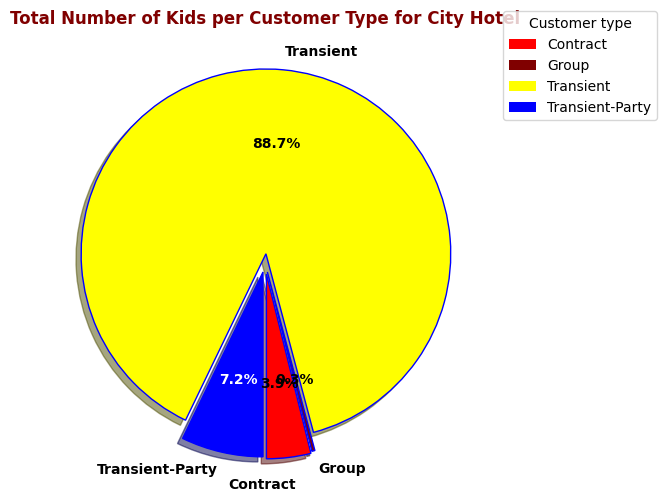

In [96]:
fig, ax = plt.subplots(figsize=(6,6))
colors=['red','maroon','yellow','blue']
wedge,labels, values = plt.pie(list(city_kid_type),labels=city_kid_type.keys(),colors=colors,autopct='%1.1f%%',explode=[0.06,0.05,0.05,0.05 ],startangle=-90,shadow=True, textprops={'fontsize':10,'fontweight':'bold'})
plt.title('Total Number of Kids per Customer Type for City Hotel',color='maroon',fontweight='bold')

plt.legend(title='Customer type',bbox_to_anchor=(1,1.06))

for i,wedge in enumerate(wedge):
  wedge.set_edgecolor('blue')

values[3].set_color('white')
labels[0].set_position((-0.2,-1.2))

plt.show()

* **Here from abopve both Charts we come to know that almost 90% kids are belongs to trainsient customers type.**

### **1.4.7 Special Requests**

In [97]:
resort_hotel['total_of_special_requests'].describe()

count    39596.000000
mean         0.621048
std          0.813648
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: total_of_special_requests, dtype: float64

In [98]:
city_hotel['total_of_special_requests'].describe()

count    62975.000000
mean         0.470615
std          0.733218
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: total_of_special_requests, dtype: float64

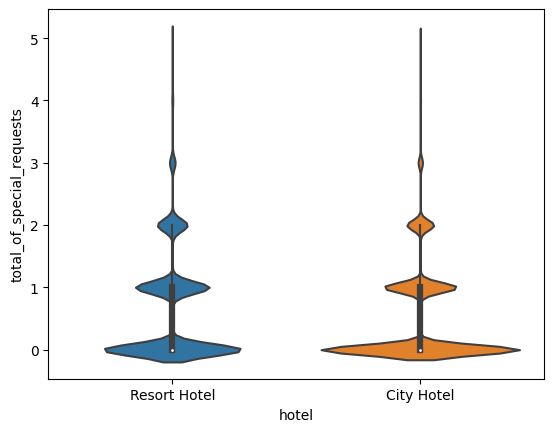

In [99]:
sns.violinplot(x=hotel_booking_df['hotel'],y=hotel_booking_df['total_of_special_requests'])
plt.show()

 **1.4.7.1 Total special requests with respect to Customer Type**

**1. Resort Hotel**

In [100]:
special_req_customer_typ = resort_hotel.groupby(by=['customer_type'])['total_of_special_requests'].sum().reset_index(name='total special request')
special_req_customer_typ

,customer_type,total special request
0,Contract,885.0
1,Group,166.0
2,Transient,20612.0
3,Transient-Party,2928.0


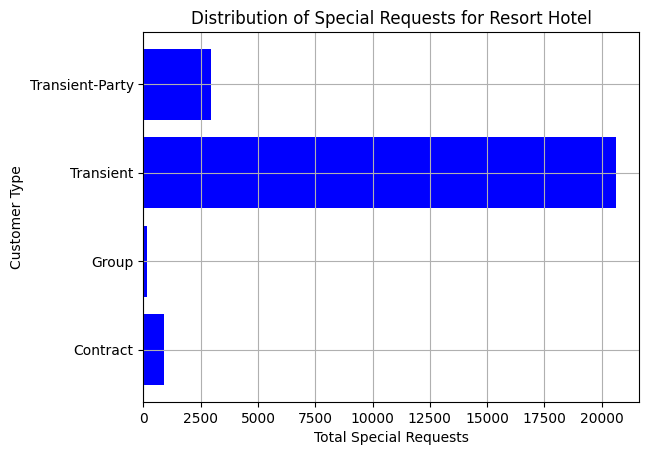

In [101]:
d = plt.barh(special_req_customer_typ['customer_type'],special_req_customer_typ['total special request'],color='blue')
plt.title("Distribution of Special Requests for Resort Hotel")
plt.xlabel('Total Special Requests')
plt.ylabel('Customer Type')
plt.grid(True)
plt.show()

**2. City Hotel**

In [102]:
special_req_customer_typ_02 = city_hotel.groupby(by=['customer_type'])['total_of_special_requests'].sum().reset_index(name='total special request')
special_req_customer_typ_02

,customer_type,total special request
0,Contract,2080.0
1,Group,113.0
2,Transient,23917.0
3,Transient-Party,3527.0


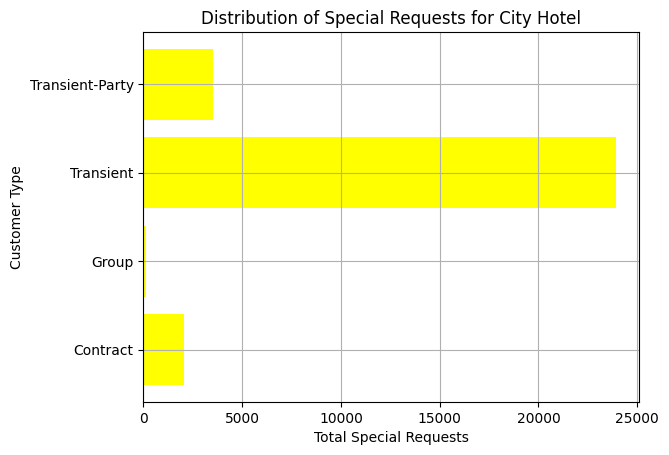

In [103]:
d = plt.barh(special_req_customer_typ_02['customer_type'],special_req_customer_typ_02['total special request'],color='yellow')
plt.title("Distribution of Special Requests for City Hotel")
plt.xlabel('Total Special Requests')
plt.ylabel('Customer Type')
plt.grid(True)
plt.show()



---


* **As we can see here in both Graphs, the Most of the special requests are from transient group of customers.**


---



### **1.4.8 Checking which type of customers needed the most parking space**

In [104]:
hotel_parking = hotel_booking_df.groupby(by=['hotel','customer_type'])['required_car_parking_spaces'].sum().reset_index(name='parking spaces')
hotel_parking

,hotel,customer_type,parking spaces
0,City Hotel,Contract,91.0
1,City Hotel,Group,6.0
2,City Hotel,Transient,1226.0
3,City Hotel,Transient-Party,123.0
4,Resort Hotel,Contract,44.0
5,Resort Hotel,Group,44.0
6,Resort Hotel,Transient,4659.0
7,Resort Hotel,Transient-Party,678.0


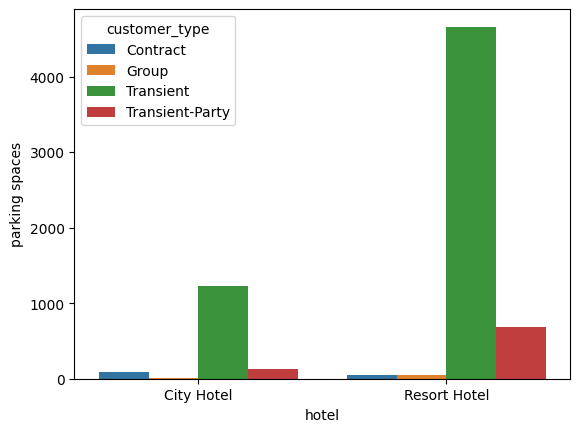

In [105]:
sns.barplot(x='hotel',y='parking spaces',data=hotel_parking,hue='customer_type')
plt.show()



---


* **Here we can see that the transient group of peoples required the most of the parking spaces.**


---



## **1.5 Booking Plans**

### **1. Resort Hotel**

In [106]:
meals = resort_hotel['meal'].value_counts()
meals

BB           29578
HB            8017
Undefined     1165
FB             754
SC              82
Name: meal, dtype: int64

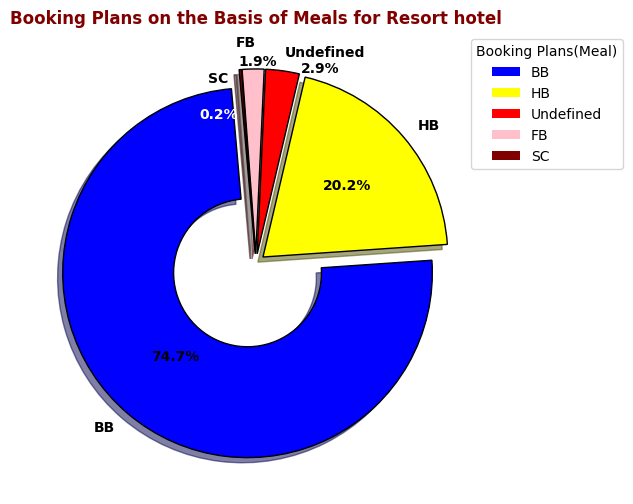

In [107]:
fig, ax = plt.subplots(figsize=(6,6))

colors = ['blue','yellow','red','pink','maroon']

wedge,labels, values = plt.pie(list(meals),labels=meals.keys(),colors=colors,autopct='%1.1f%%',explode=[0.07,0.05,0.05,0.05,0.05],startangle=-265,shadow=True, textprops={'fontsize':10,'fontweight':'bold'})
plt.title('Booking Plans on the Basis of Meals for Resort hotel',color='maroon',fontweight='bold')

plt.legend(title='Booking Plans(Meal)',bbox_to_anchor=(0.95,1))

for i,wedge in enumerate(wedge):
  wedge.set_edgecolor('black')
  #wedge.set_width(0.6)
  if meals.keys()[i] == "BB":
    wedge.set_width(0.6)

labels[4].set_position((-0.15,1))
labels[3].set_position((0,1.19))

values[4].set_color('white')
values[2].set_position((0.35,1.05))
values[3].set_position((0.01,1.09))
values[4].set_position((-0.2,0.8))

plt.show()



---


* **1.5.1 Analysing the Above Infromation About Booking Plans with respect to Type of Customers**

In [108]:
resort_meal_customer = resort_hotel.groupby(by=['meal','customer_type']).size().reset_index(name='total booking')
resort_meal_customer[0:8]

,meal,customer_type,total booking
0,BB,Contract,1150
1,BB,Group,247
2,BB,Transient,23575
3,BB,Transient-Party,4606
4,FB,Contract,5
5,FB,Group,1
6,FB,Transient,539
7,FB,Transient-Party,209


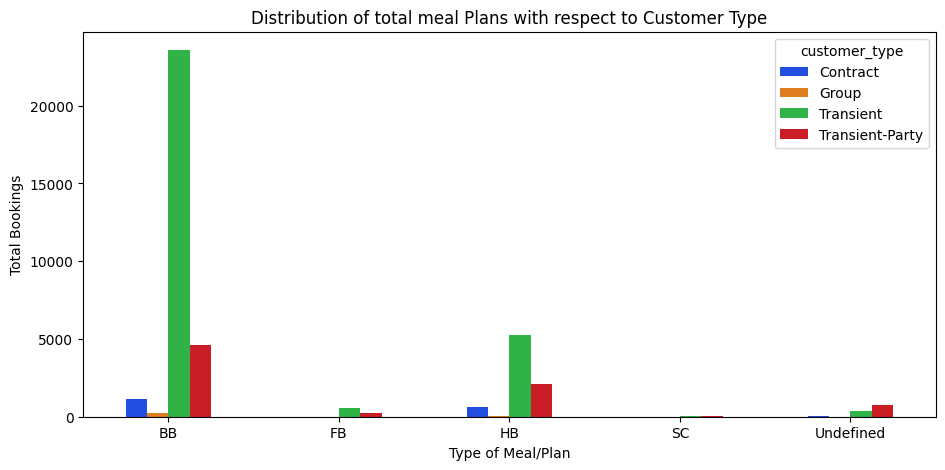

In [109]:
plt.figure(figsize=(11,5))
sns.barplot(x='meal',y='total booking',data=resort_meal_customer,palette="bright",width=0.5,hue='customer_type')
#sns.lineplot(x='arrival_date_month',y='Total checked in',data=month,hue='hotel')
plt.title('Distribution of total meal Plans with respect to Customer Type')
plt.xlabel('Type of Meal/Plan')
plt.ylabel('Total Bookings')
plt.show()



---
*  **From the Above Pie Chart, Here we got very important insight that in Resort hotel almost '75%' customers prefer the 'BB' meal/Plan and almost '20.2%' customers prefer the 'HB' meal/Plan while Booking the Hotel.**
* **In the Bar plot we can Clearly see the Dominance of Transient Customers, It indicates that most of the Transient/individual customers prefer the 'BB' and 'HB' plans for booking the hotel.**

* **The transient-prty type of customers have also preferd the 'BB' & 'HB' plans than any other plan.**

* **This Indicates that the most of the transient customers are more likely to book a hotel in lower rate as BB & HB plans are low costier than other plans.**
---




### **2. City Hotel**

In [110]:
meals_02 = city_hotel['meal'].value_counts()
meals_02

BB    50428
SC     7319
HB     5187
FB       42
Name: meal, dtype: int64

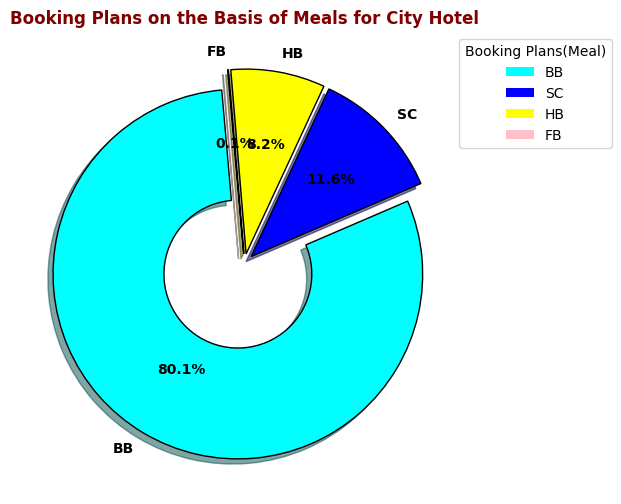

In [111]:
fig, ax = plt.subplots(figsize=(6,6))

colors = ['aqua','blue','yellow','pink']

wedge,labels, values = plt.pie(list(meals_02),labels=meals_02.keys(),colors=colors,autopct='%1.1f%%',explode=[0.07,0.05,0.05,0.05],startangle=-265,shadow=True, textprops={'fontsize':10,'fontweight':'bold'})
plt.title('Booking Plans on the Basis of Meals for City Hotel',color='maroon',fontweight='bold')

plt.legend(title='Booking Plans(Meal)',bbox_to_anchor=(0.95,1))

for i,wedge in enumerate(wedge):
  wedge.set_edgecolor('black')
  #wedge.set_width(0.6)
  if meals.keys()[i] == "BB":
    wedge.set_width(0.6)

plt.show()



---


* **1.5.2 Analysing the Above Infromation About Booking Plans with respect to Type of Customers**

In [112]:
city_meal_customer = city_hotel.groupby(by=['meal','customer_type']).size().reset_index(name='total booking')
city_meal_customer[0:8]

,meal,customer_type,total booking
0,BB,Contract,2088
1,BB,Group,196
2,BB,Transient,37312
3,BB,Transient-Party,10831
4,FB,Transient,6
5,FB,Transient-Party,36
6,HB,Contract,9
7,HB,Group,7


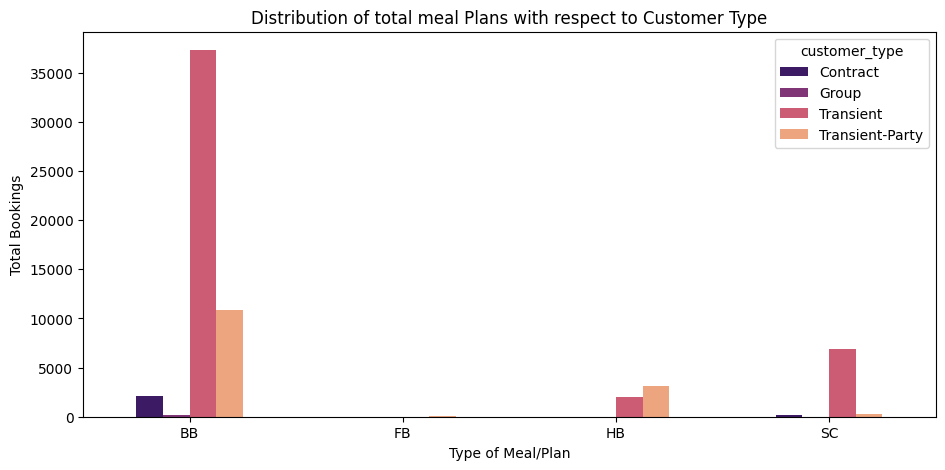

In [113]:
plt.figure(figsize=(11,5))
sns.barplot(x='meal',y='total booking',data=city_meal_customer,palette="magma",width=0.5,hue='customer_type')
#sns.lineplot(x='arrival_date_month',y='Total checked in',data=month,hue='hotel')
plt.title('Distribution of total meal Plans with respect to Customer Type')
plt.xlabel('Type of Meal/Plan')
plt.ylabel('Total Bookings')
plt.show()



---
* **From the Above Pie Chart, Here we got very important insight that in city Hotel similar to the Resort Hotel almost '78%' customers prefer the 'BB' meal/Plan, but Here almost '13.3%' customers prefer the 'SC' meal/Plan.****

* **Like to Resort Hotel here in City hotel also most of the Transient Customers prefer the 'BB' meal plan, But here the interesting thing is that the many customers have prefered the SC(service charge) in addition to room rent, this is one of the noticable thinig in City Hotel.**
---




# **Conclusions :**

---

* **By Observing Almost all Patterns related to the Booking, Now we come to know that Throught Out the whole Year specially in two seasons which are summer (April,May) and Mansoon (July,August) customers are more likely to book hotels.**

* **In These Months most of the Customer Book the Hotel For Long Term.**

* **The booking Cancelation rate is also less in this period.**

* **With Increase in Number of customer in this period the Demand for Weekend Nights is also increased.**

* **For Both Resort Hotel & City Hotel the customers gives more preference to the BB(Bed & Breakfast) plan. Here we clearly see the dominance of transient customers.**

* **But in City Hotel many customers specially transient customers also prefer to give additional SC(Service Charge) while booking.**

* **In both Resort hotel & City hotel customers have given more preference to the 'A' & 'D' Type of Rooms while Booking**

* **But the intersting thing in City Hotel is that almost 94% reserved rooms are only of type 'A' & 'D'**

* **In Resort hotel most of the customers having kids have prefered the G type of Rooms where in City hotel the customers having kids have prefered the F type of rooms most.**

* **In both City & Resort Hotels, There is defecinecy for A type of Rooms, in Resort Hotel out of 58.1% customers only 42.6% customers have got the A type rooms and in City Resort out of 78.9% customers only 71.9% customers have got the A type of Rooms.**

* **Therefore it become important to provide the desired rooms to the customers, for that both hotels should increase the numbers of A type rooms.**

* **On an Avearge 2 customers have booked the rooms in both hotels.**

* **But the big difference is there in maximum numbers of customers per booking, In Resort hotel the maximum number is '55' & in City hotel the maximum number is '12'.**
---

# **2. Market Segment & Distribution Channels**

### **1. Resort Hotel**

* **Market Segment**

In [114]:
resort_market_segment = resort_hotel['market_segment'].value_counts()
resort_market_segment

Online TA        17655
Offline TA/TO     7427
Direct            6357
Groups            5832
Corporate         2126
Complementary      199
Name: market_segment, dtype: int64

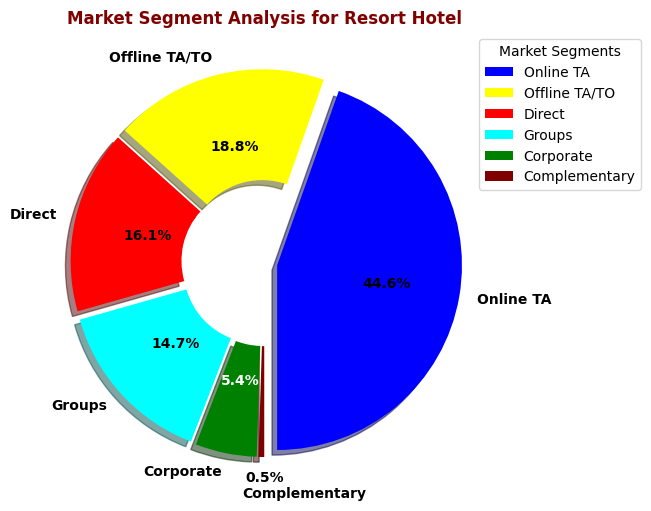

In [115]:
fig, ax = plt.subplots(figsize=(6,6))

colors = ['blue','yellow','red','aqua','green','maroon']

wedge,labels, values = plt.pie(list(resort_market_segment),labels=resort_market_segment.keys(),colors=colors,autopct='%1.1f%%',explode=[0.07,0.05,0.05,0.05,0.05,0.05],startangle=-90,shadow=True, textprops={'fontsize':10,'fontweight':'bold'})
plt.title('Market Segment Analysis for Resort Hotel',color='maroon',fontweight='bold')

plt.legend(title='Market Segments',bbox_to_anchor=(0.95,1))

for i,wedge in enumerate(wedge):
  if resort_market_segment.keys()[i] != "Online TA":
    wedge.set_width(0.6)
values[4].set_color('white')
values[5].set_position((0,-1.16))
labels[5].set_position((0.55,-1.25))

plt.show()

* **Distribution Channel**

In [116]:
resort_dist_channel = resort_hotel['distribution_channel'].value_counts()
resort_dist_channel

TA/TO        28800
Direct        7705
Corporate     3090
Undefined        1
Name: distribution_channel, dtype: int64

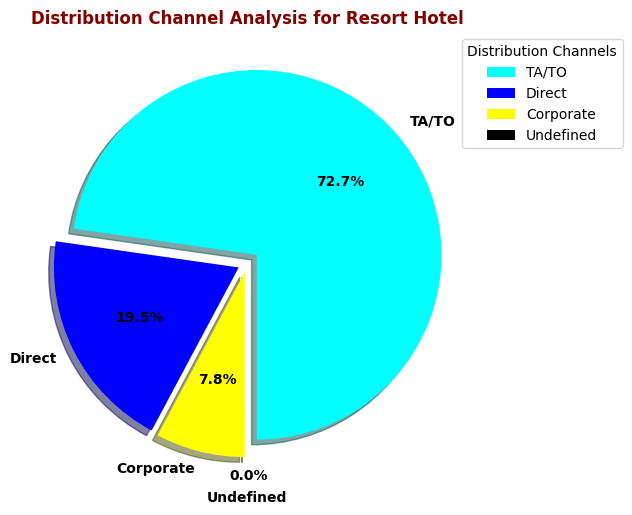

In [117]:
fig, ax = plt.subplots(figsize=(6,6))

colors = ['aqua','blue','yellow','black']

wedge,labels, values = plt.pie(list(resort_dist_channel),labels=resort_dist_channel.keys(),colors=colors,autopct='%1.1f%%',explode=[0.07,0.05,0.05,0.05],startangle=-90,shadow=True, textprops={'fontsize':10,'fontweight':'bold'})
plt.title('Distribution Channel Analysis for Resort Hotel',color='maroon',fontweight='bold')

plt.legend(title='Distribution Channels',bbox_to_anchor=(0.95,1))

values[3].set_position((0.01,-1.15))
labels[3].set_position((0.22,-1.27))

plt.show()

### **2. City Hotel**

* **Market Segment**

In [118]:
city_market_segment = city_hotel['market_segment'].value_counts()
city_market_segment

Online TA        28794
Offline TA/TO    14377
Groups           12508
Direct            4006
Corporate         2658
Complementary      455
Aviation           176
Undefined            2
Name: market_segment, dtype: int64

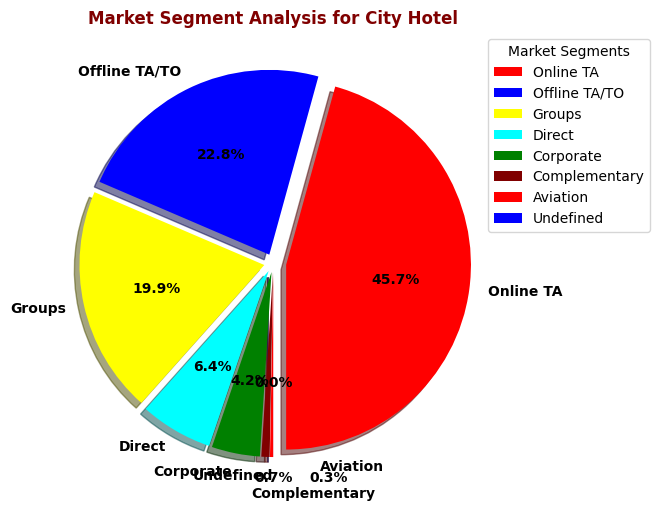

In [119]:
fig, ax = plt.subplots(figsize=(6,6))

colors = ['red','blue','yellow','aqua','green','maroon']

wedge,labels, values = plt.pie(list(city_market_segment),labels=city_market_segment.keys(),colors=colors,autopct='%1.1f%%',explode=[0.07,0.05,0.05,0.05,0.05,0.05,0.05,0.05],startangle=-90,shadow=True, textprops={'fontsize':10,'fontweight':'bold'})
plt.title('Market Segment Analysis for City Hotel',color='maroon',fontweight='bold')

plt.legend(title='Market Segments',bbox_to_anchor=(0.95,1))

values[5].set_position((0,-1.16))
values[6].set_position((0.3,-1.16))
labels[5].set_position((0.55,-1.25))
labels[6].set_position((0.6,-1.1))

plt.show()

* **Distribution Channel**

In [120]:
city_dist_channel = city_hotel['distribution_channel'].value_counts()
city_dist_channel

TA/TO        55291
Direct        4610
Corporate     2957
GDS            114
Undefined        4
Name: distribution_channel, dtype: int64

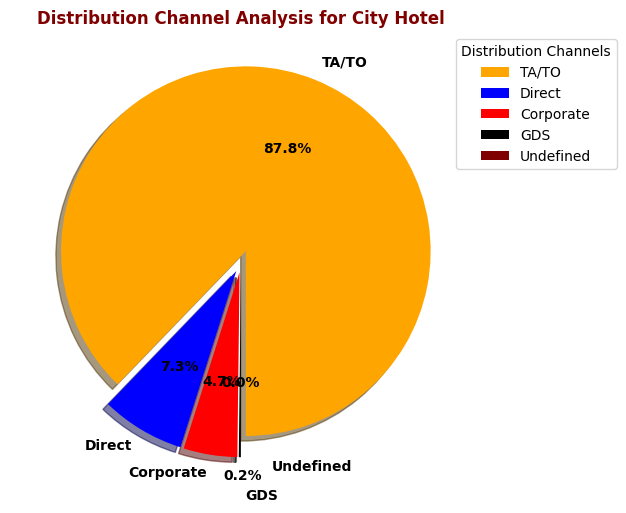

In [121]:
fig, ax = plt.subplots(figsize=(6,6))

colors = ['orange','blue','red','black','maroon']

wedge,labels, values = plt.pie(list(city_dist_channel),labels=city_dist_channel.keys(),colors=colors,autopct='%1.1f%%',explode=[0.07,0.05,0.05,0.05,0.05],startangle=-90,shadow=True, textprops={'fontsize':10,'fontweight':'bold'})
plt.title('Distribution Channel Analysis for City Hotel',color='maroon',fontweight='bold')

plt.legend(title='Distribution Channels',bbox_to_anchor=(0.95,1))

values[3].set_position((0.01,-1.15))
labels[3].set_position((0.2,-1.26))
labels[4].set_position((0.6,-1.1))

plt.show()

### **2.1 Analyzing the Type of customers with respect to Distribution Channel**

**1. Resort Hotel**

In [122]:
resort_dist_channel_customer = resort_hotel.groupby(by=['distribution_channel'])['customer_type'].value_counts().reset_index(name='count')
resort_dist_channel_customer

,distribution_channel,customer_type,count
0,Corporate,Transient,1708
1,Corporate,Transient-Party,1341
2,Corporate,Contract,27
3,Corporate,Group,14
4,Direct,Transient,6120
5,Direct,Transient-Party,1507
6,Direct,Group,65
7,Direct,Contract,13
8,TA/TO,Transient,21963
9,TA/TO,Transient-Party,4902


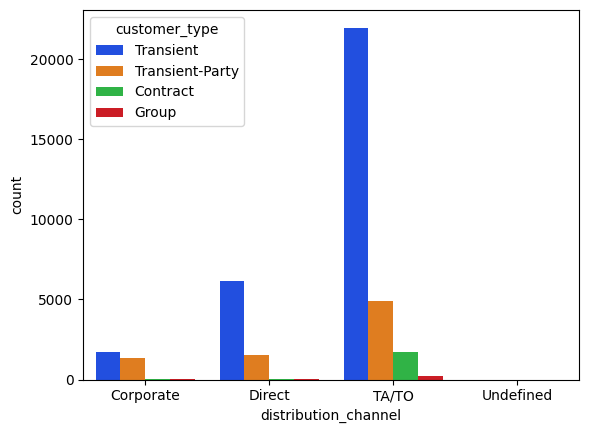

In [123]:
sns.barplot(x='distribution_channel',y='count',data=resort_dist_channel_customer,hue='customer_type',palette='bright')
plt.show()

**2. city Hotel**

In [124]:
city_dist_channel_customer = city_hotel.groupby(by=['distribution_channel'])['customer_type'].value_counts().reset_index(name='count')
city_dist_channel_customer

,distribution_channel,customer_type,count
0,Corporate,Transient,1963
1,Corporate,Transient-Party,980
2,Corporate,Group,14
3,Direct,Transient,4085
4,Direct,Transient-Party,478
5,Direct,Group,40
6,Direct,Contract,6
7,GDS,Transient,114
8,TA/TO,Transient,40066
9,TA/TO,Transient-Party,12790


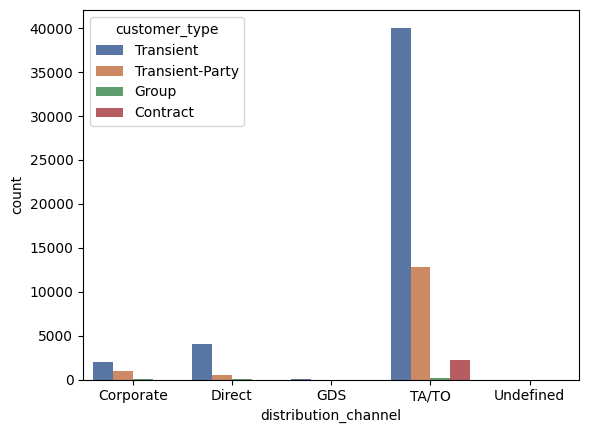

In [125]:
sns.barplot(x='distribution_channel',y='count',data=city_dist_channel_customer,hue='customer_type',palette='deep')
plt.show()


# **Conclusions :**
---


* **Market Segment :**

 * **In Resort Hotel Almost 63% Market segment is online/offline Travel Angencies, and them with 16.1% the Direct Market Segment is at the Second Position.**

 * **Similar to the Resort Hotel in City Hotel almost 60% of Market segment is only online/offline TA/TO. But here the distinct difference is that with almost 17.6% the 'Group' Market segment is at the second position.**

* **Distribution Channel :**

 * **In resort Hotel 72.7% Reservations are done through the Travel Agencies and almost 19.5% customers have registered Directly.**

 * **Whereas, In City Hotel almost 87% registraions are done trhough the Travel Agencies by customers and only 8.5% customers have registered Directly to the hotel.**

 * **From both bar charts we come to know that as usual the transient type of customers are Travel Agencies to Book the Hotels than any other type of customers.**

* **Here we can clearly see the Importance of Network with Different Travel Agencies, Most of the customers have registered themselves through these agencies.**


---



# **3. Revenue Analysis**

## **3.1 Analyzing the ADR**

### **3.1.1 ADR with respecrt to meal plans**

**1. Resort Hotel**

In [126]:
resort_hotel['adr'].describe()

count    39596.000000
mean        95.347555
std         61.495116
min         -6.380000
25%         50.500000
50%         76.000000
75%        125.617500
max        508.000000
Name: adr, dtype: float64

In [127]:
#The Day at which Resort Hotel was in loss
loss_day = resort_hotel[resort_hotel['adr']<0]
loss_day

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_month,Total_kids,Total_stay,Total_revenue,Total_members
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,-6.38,0.0,0.0,Check-Out,2017-03-15,March,0.0,10,-63.8,2.0


In [128]:
loss_day.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'reservation_status_month', 'Total_kids', 'Total_stay', 'Total_revenue',
       'Total_members'],
      dtype='object')

In [129]:
print(loss_day['meal'])
print(loss_day['reserved_room_type'])
print(loss_day['assigned_room_type'])

14969    BB
Name: meal, dtype: object
14969    A
Name: reserved_room_type, dtype: object
14969    H
Name: assigned_room_type, dtype: object


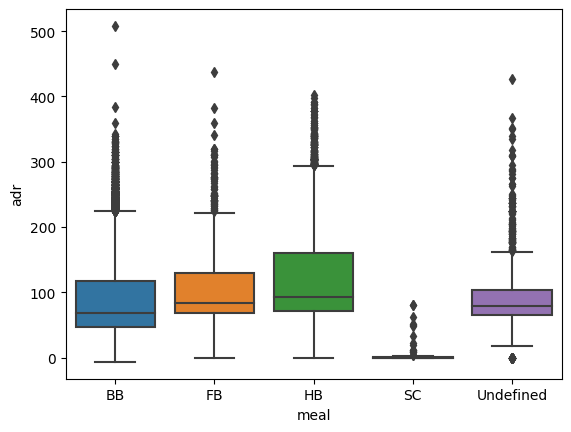

In [131]:
sns.boxplot(y='adr',x='meal',data=resort_hotel)
plt.show()

In [132]:
resort_adr_meal = resort_hotel.groupby(by='meal')['adr'].mean().reset_index(name='avg adr')
resort_adr_meal

,meal,avg adr
0,BB,88.531166
1,FB,110.945358
2,HB,120.435120
3,SC,6.353537
4,Undefined,91.935451


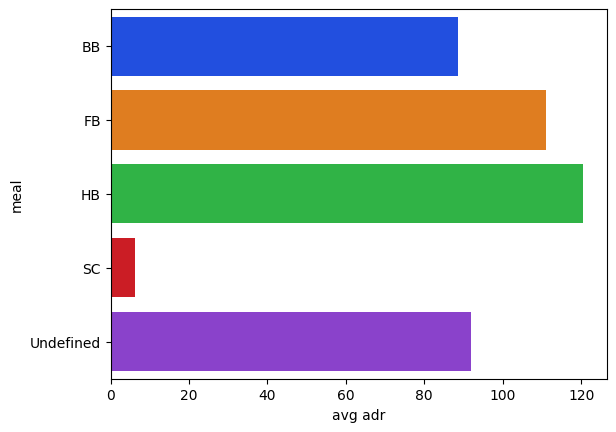

In [133]:
sns.barplot(y='meal',x='avg adr',data=resort_adr_meal,palette='bright')
plt.show()

**2. City Hotel**

In [134]:
city_hotel['adr'].describe()

count    62975.000000
mean       102.318775
std         43.311309
min          0.000000
25%         76.500000
50%         96.900000
75%        121.230000
max       5400.000000
Name: adr, dtype: float64

In [135]:
#Filtering the Required Records by seperating one Outlier having ADR 5400
city_adr = city_hotel[city_hotel['adr']<5400]
city_adr['adr'].describe()

count    62974.000000
mean       102.234650
std         37.818226
min          0.000000
25%         76.500000
50%         96.900000
75%        121.210000
max        365.000000
Name: adr, dtype: float64

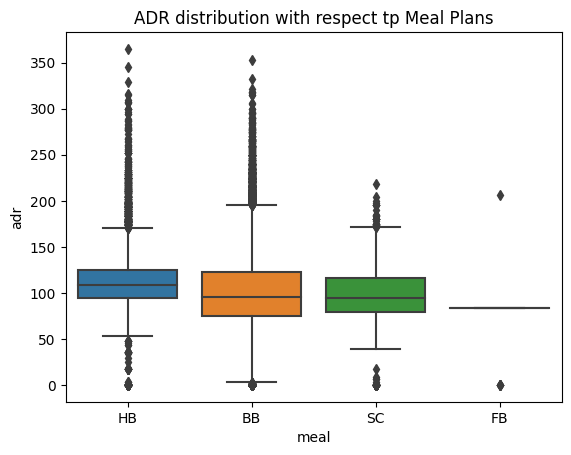

In [136]:
sns.boxplot(y='adr',x='meal',data=city_adr)
plt.title('ADR distribution with respect tp Meal Plans')
plt.show()

In [137]:
city_adr_meal = city_hotel.groupby(by='meal')['adr'].mean().reset_index(name='avg adr')
city_adr_meal

,meal,avg adr
0,BB,101.663788
1,FB,74.904762
2,HB,115.001051
3,SC,98.000899


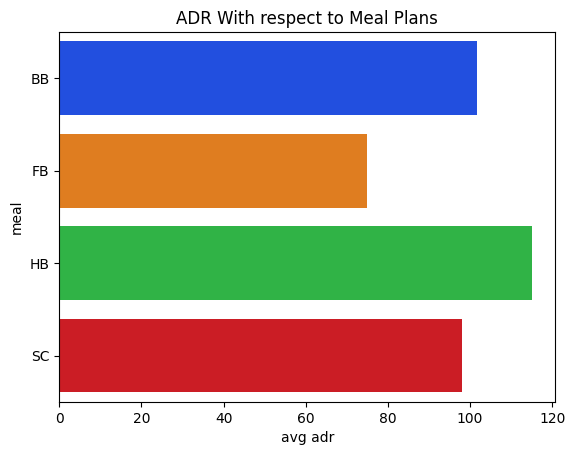

In [138]:
sns.barplot(y='meal',x='avg adr',data=city_adr_meal,palette='bright')
plt.title('ADR With respect to Meal Plans')
plt.show()

### **3.1.2 ADR with respect to Room Type**

**1. Resort Hotel**

In [139]:
avg_adr_room_type_resort = resort_hotel.groupby(by=['reserved_room_type'])['adr'].mean().reset_index(name='ADR')[0:5]
avg_adr_room_type_resort

,reserved_room_type,ADR
0,A,76.610201
1,B,104.666667
2,C,161.532497
3,D,103.697106
4,E,114.533843


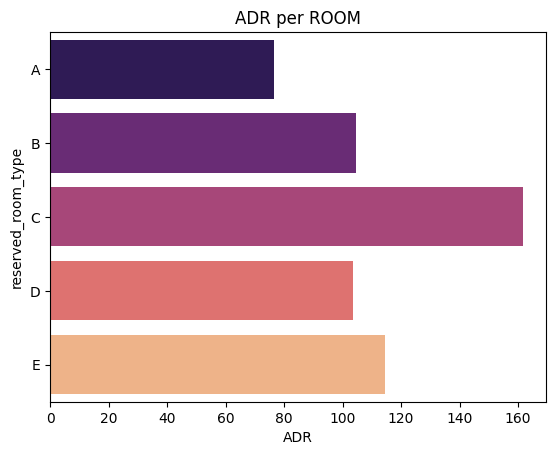

In [140]:
sns.barplot(x='ADR',y='reserved_room_type',data=avg_adr_room_type_resort,palette='magma')
plt.title('ADR per ROOM')
plt.show()

In [141]:
avg_adr_room_type = resort_hotel.groupby(by=['reserved_room_type','customer_type'])['adr'].mean().reset_index(name='ADR')
avg_adr_room_type[0:5]

,reserved_room_type,customer_type,ADR
0,A,Contract,70.876294
1,A,Group,58.507200
2,A,Transient,80.418504
3,A,Transient-Party,67.319563
4,B,Transient,104.666667


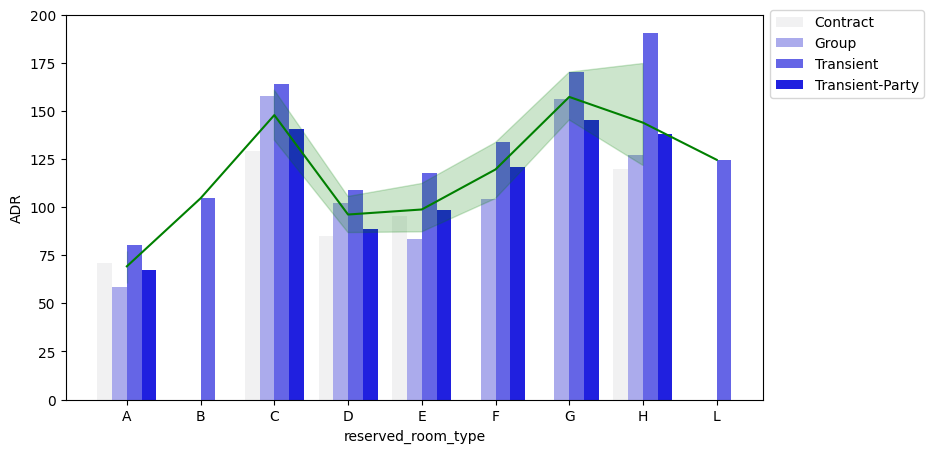

In [142]:
plt.figure(figsize=(9,5))
sns.barplot(x='reserved_room_type',y='ADR',data=avg_adr_room_type,hue='customer_type',color='blue')
sns.lineplot(x='reserved_room_type',y='ADR',data=avg_adr_room_type,color='green')
plt.legend(bbox_to_anchor=(1,1.03))
plt.show()

**2. City Hotel**

In [143]:
avg_adr_room_type_city = city_hotel.groupby(by=['reserved_room_type'])['adr'].mean().reset_index(name='ADR')[0:7]
avg_adr_room_type_city

,reserved_room_type,ADR
0,A,94.416568
1,B,88.994384
2,C,91.062500
3,D,128.745952
4,E,150.721996
5,F,185.155325
6,G,186.864304


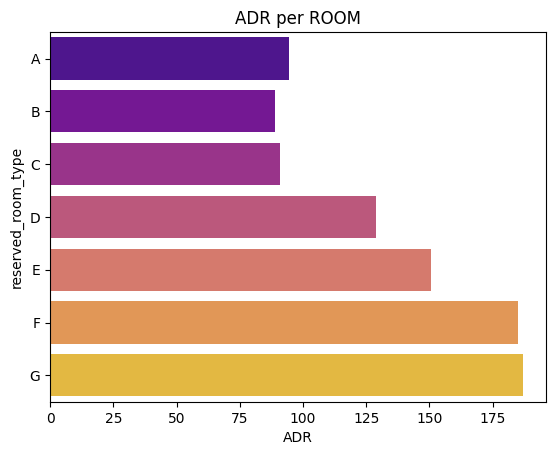

In [144]:
sns.barplot(x='ADR',y='reserved_room_type',data=avg_adr_room_type_city,palette='plasma')
plt.title('ADR per ROOM')
plt.show()

In [145]:
avg_adr_room_type02 = city_hotel.groupby(by=['reserved_room_type','customer_type'])['adr'].mean().reset_index(name='ADR')
avg_adr_room_type02[0:5]

,reserved_room_type,customer_type,ADR
0,A,Contract,87.960382
1,A,Group,89.281880
2,A,Transient,97.748792
3,A,Transient-Party,86.524807
4,B,Contract,95.110533


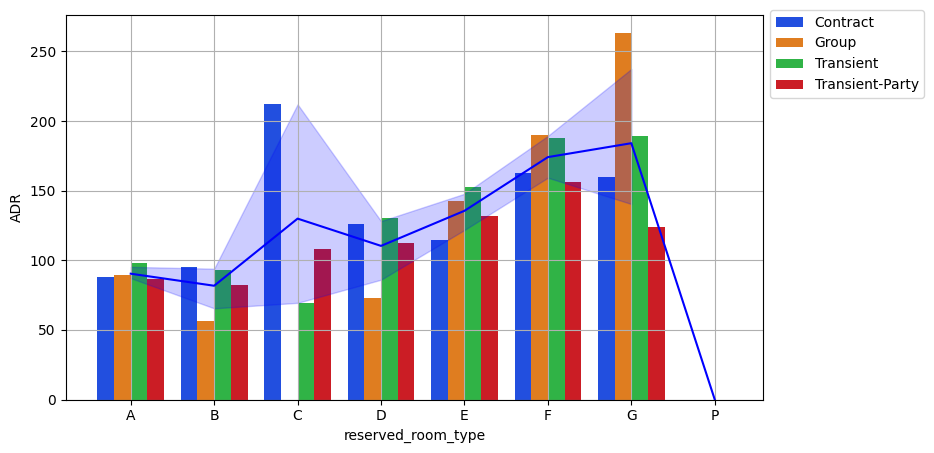

In [146]:
plt.figure(figsize=(9,5))
sns.barplot(x='reserved_room_type',y='ADR',data=avg_adr_room_type02,hue='customer_type',palette='bright')
sns.lineplot(x='reserved_room_type',y='ADR',data=avg_adr_room_type02,color='blue')
plt.legend(bbox_to_anchor=(1,1.03))
plt.grid(True)
plt.show()

### **3.1.1 Analyzing Average ADR per Month**

In [147]:
avg_adr = hotel_booking_df.groupby(by=['arrival_date_month','hotel'])['adr'].mean().reset_index(name='ADR')
#Month list to sort the dataset from Jaunary to Decermber
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
avg_adr = avg_adr.sort_values(by='arrival_date_month', key=lambda x: x.map({val: i for i, val in enumerate(month_order)}))
avg_adr[0:6]

,arrival_date_month,hotel,ADR
8,January,City Hotel,79.844948
9,January,Resort Hotel,49.673157
6,February,City Hotel,82.597246
7,February,Resort Hotel,55.445661
15,March,Resort Hotel,57.802130
14,March,City Hotel,92.507398


In [148]:
avg_adr.describe()

,ADR
count,24.000000
mean,93.195028
std,32.169134
min,48.429937
25%,75.904210
50%,90.298180
75%,108.466367
max,186.914071


In [149]:
hotel_booking_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'reservation_status_month', 'Total_kids', 'Total_stay', 'Total_revenue',
       'Total_members'],
      dtype='object')

In [150]:
total_revenue = hotel_booking_df.groupby(by=['arrival_date_month','hotel'])['Total_revenue'].sum().reset_index(name='Total_Revenue')
#Month list to sort the dataset from Jaunary to Decermber
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
total_revenue = total_revenue.sort_values(by='arrival_date_month', key=lambda x: x.map({val: i for i, val in enumerate(month_order)}))
total_revenue[0:6]

,arrival_date_month,hotel,Total_Revenue
8,January,City Hotel,611923.56
9,January,Resort Hotel,313771.97
6,February,City Hotel,845092.91
7,February,Resort Hotel,525059.04
15,March,Resort Hotel,808501.75
14,March,City Hotel,1247047.28


In [151]:
city_TR = total_revenue[total_revenue['hotel']=='City Hotel']
city_TR.describe()

,Total_Revenue
count,1.200000e+01
mean,1.615481e+06
std,6.264147e+05
min,6.119236e+05
25%,1.097316e+06
50%,1.868548e+06
75%,2.048003e+06
max,2.408672e+06


<ipython-input-153-4d2e12169ddf>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


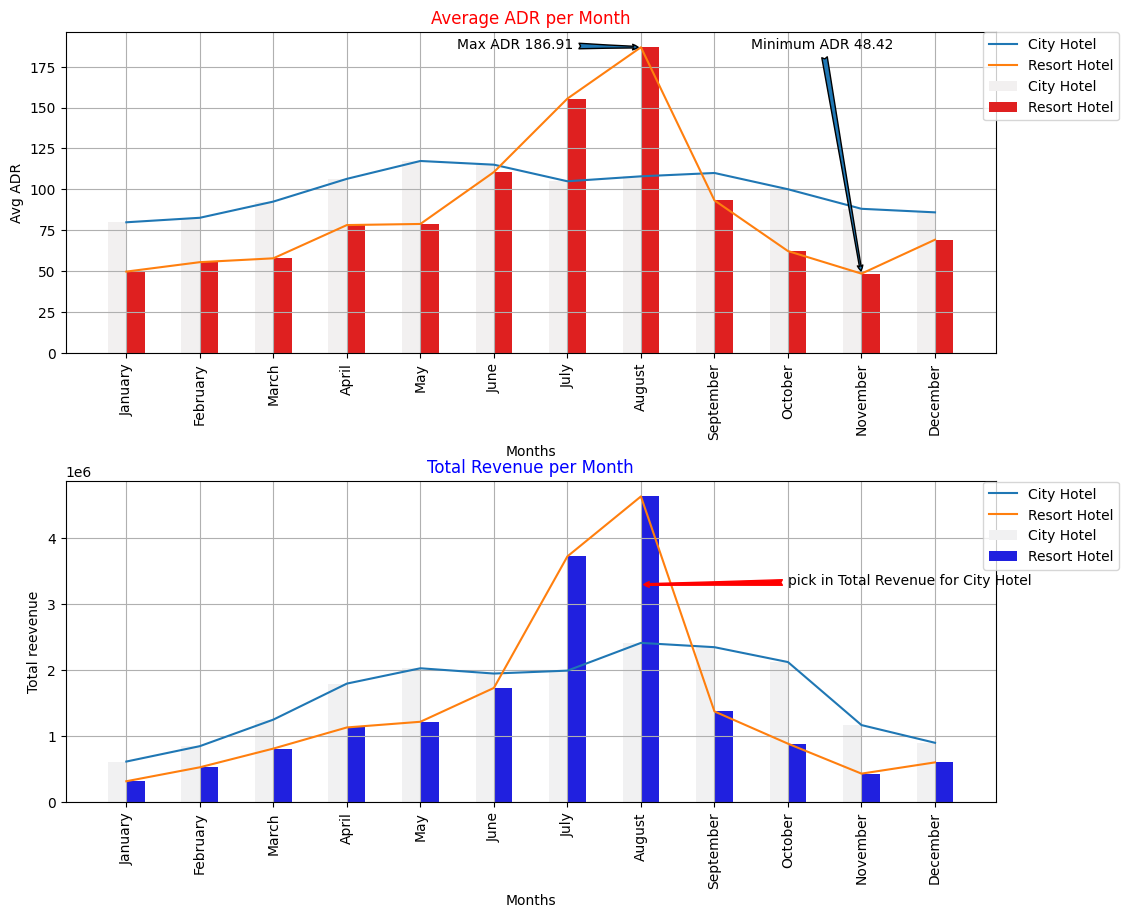

In [153]:
fig, ax = plt.subplots(figsize=(12,10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.subplot(2,1,1)
sns.barplot(x='arrival_date_month',y='ADR',data=avg_adr,color='red',width=0.5,hue='hotel')
sns.lineplot(x='arrival_date_month',y='ADR',data=avg_adr,hue='hotel')

plt.annotate('Max ADR 186.91',(7,186.91),xytext=(4.5,186),arrowprops=dict(arrowstyle="fancy"))
plt.annotate('Minimum ADR 48.42',(10,48.42),xytext=(8.5,186),arrowprops=dict(arrowstyle="fancy"))
plt.title('Average ADR per Month',color='red')
plt.xlabel('Months')
plt.ylabel('Avg ADR')
plt.legend(bbox_to_anchor=(1.14,1.02))
plt.grid(True)
plt.xticks(rotation=90)

plt.subplot(2,1,2)
sns.barplot(x='arrival_date_month',y='Total_Revenue',data=total_revenue,color='blue',width=0.5,hue='hotel')
sns.lineplot(x='arrival_date_month',y='Total_Revenue',data=total_revenue,hue='hotel')

plt.annotate('pick in Total Revenue for City Hotel',(7,3.291651e+06),xytext=(9,3.291651e+06),arrowprops=dict(arrowstyle="fancy",color='red'))
plt.title('Total Revenue per Month',color='blue')
plt.xlabel('Months')
plt.ylabel('Total reevenue')
plt.legend(bbox_to_anchor=(1.14,1.02))
plt.grid(True)
plt.xticks(rotation=90)

plt.show()

# **Conclusions :**


---
* **From Univarient analysis of ADR for both City and Resort Hotel, we come to know that there is big difference in distribution of ADR in Reosrt and City Hotel.**

* **For Resort Hotel, we can see that there is almost Average 95.35 ADR with minimum '-6.38 ADR' and maximum '508 ADR' across the Whole Year(per Month).**

* **So here we come to know that, in hotel resort there is one day i.e. '2017-03-15' where the Hotel was in Loss. there is no proper reason has found behind that. But at that perticular record the meal plan was 'BB' plan and the room type 'A' was reserved but the 'H' type of room was assgined to that of customer.**

* **In Resort Hotel, the 'HB' plan has the highest ADR with '120.43' ADR where the SC meal plan has least ADR with '6.35' ADR.**

* **The City Hotel has Average '102.23' ADR. with least ADR of 0 and '5400.00' Highest ADR. Here we can see the difference in maximum ADR and Average ADR, so we can say that the Max ADR in this case is a outlier or a exception.**

* **In City Hotel, the 'HB' type of meal plan has highest ADR with '115.00' ADR and 'FB' meal plan has least ADR as '74.90'.**

* **Here in City Hotel, Unlike resort hotel 'SC' meal plan has almost '98.00' ADR.**

* ### **ADR with Respect to Room Type :**
 * **In Resort Hotel, 'C' type of Rooms have Highest ADR with Compare to other Types of Rooms.**

 * **But in City Hotel, 'F' & 'G' type of rooms have almost same ADR and have high ADR with compare to other types of rooms.**

 * **The all Rooms with high ADR shows that the Customers of Type 'Group' spents more.**

* **In Resort Hotel, June, July and August Months are the Pick ponits of ADR. where in August Month Hotel has Highest Average ADR as '186.91' and simultanously in November Month ADR is very less.**

* **But in case of City hotel, The distribution of average ADR across the month was almost showing stable pattern.**

* **The Reevenue Patterns is also Quite similar to ADR distribution.**